# Praca domowa 1
#### Łukasz Tomaszewski

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('diabetic_data.csv')

## Zdefiniowanie problemu i zapoznanie się z danymi

Naszym zadaniem będzie sprawdzenie, jakie czynniki wpływają na to, czy pacjent zostanie ponownie przyjęty.
#### Typ problemu - klasyfikacja binarna
#### Zmienna objaśniana - readmitted

Sprawdźmy jak wyglądają nasze dane.

In [3]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


Jakiego typu są poszczególne kolumny?

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

Czy w naszych danych występują jakieś braki?

In [5]:
df.isna().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

Nie wsytępują braki danych.

In [6]:
df.duplicated().sum()

0

Nie występują rekordy, które się powtarzają.

Zmieńmy zmienną objaśnianą.

In [7]:
df.loc[df['readmitted'] == "NO",'readmitted'] = 0
df.loc[df['readmitted'] == ">30",'readmitted'] = 1
df.loc[df['readmitted'] == "<30",'readmitted'] = 1
df['readmitted'] = df['readmitted'].astype('int64')

## Korelacje

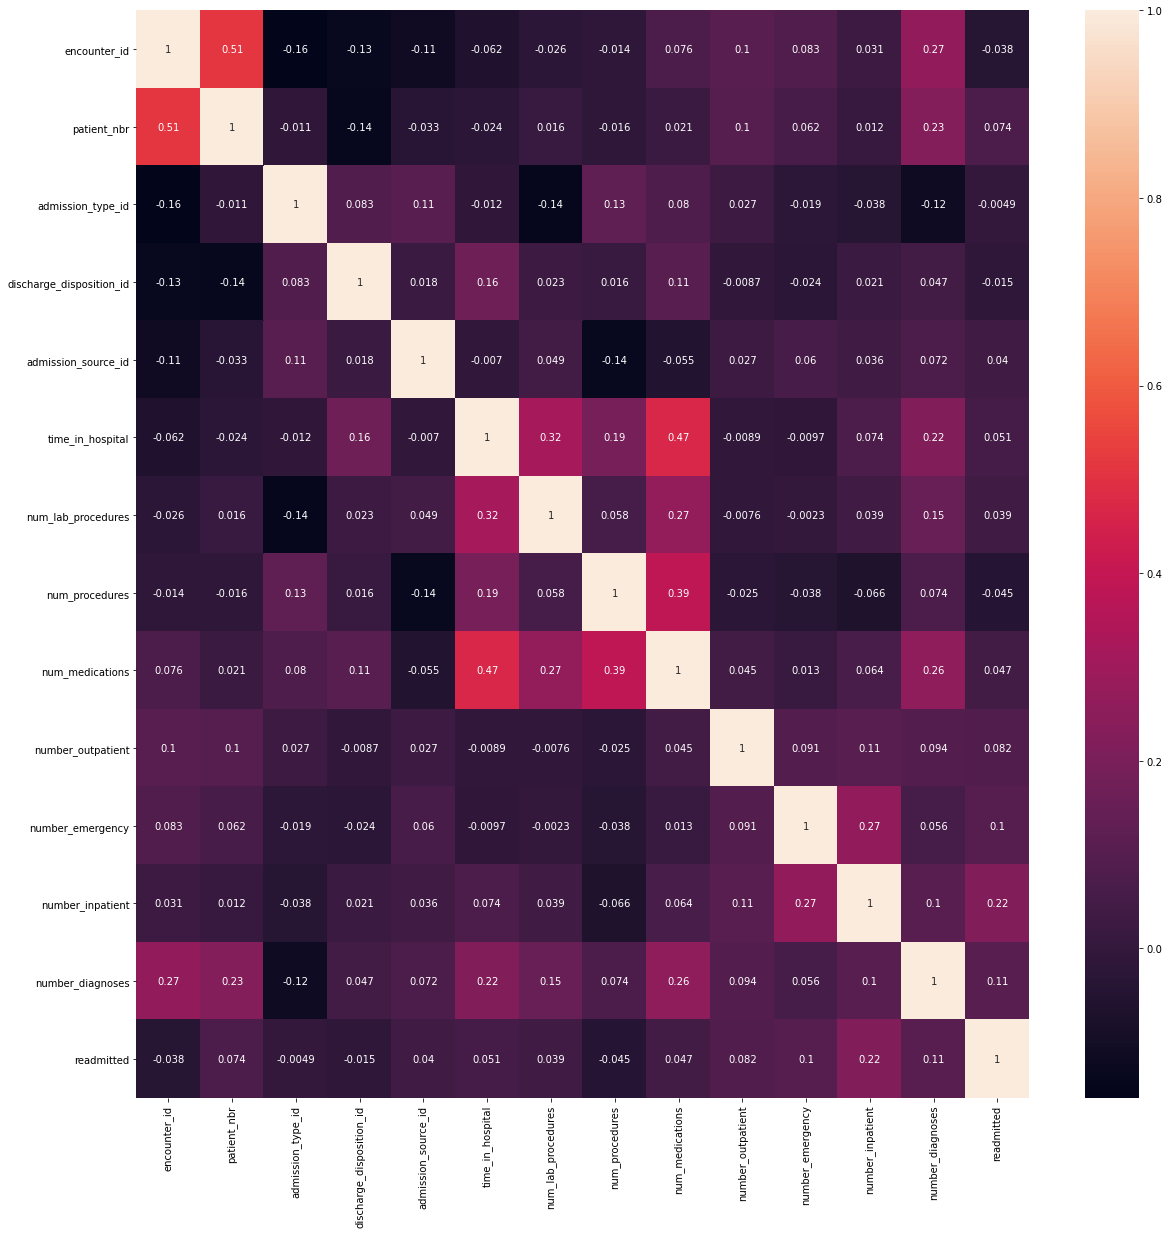

In [8]:
corr = df.corr()
%matplotlib inline
fig, axs = plt.subplots(ncols=1, figsize = (20,20))
sns.heatmap(corr, annot = True, ax = axs)
plt.show()

Najbardziej skorelowane są zmienne encounter_id i patient_id, jednak jest to nie istotne ponieważ nie będziemy ich używać. Wysoki współczynnik korelacji mają zmienne związane z ilością badań i czasem pobytu, co jest sensowne. Dane te jednak nie są wystarczająco skorelowane, aby zrezygnować z jednej z kolumn. Przedstawmy korelacje o wysokim współczynniku na wykresach.

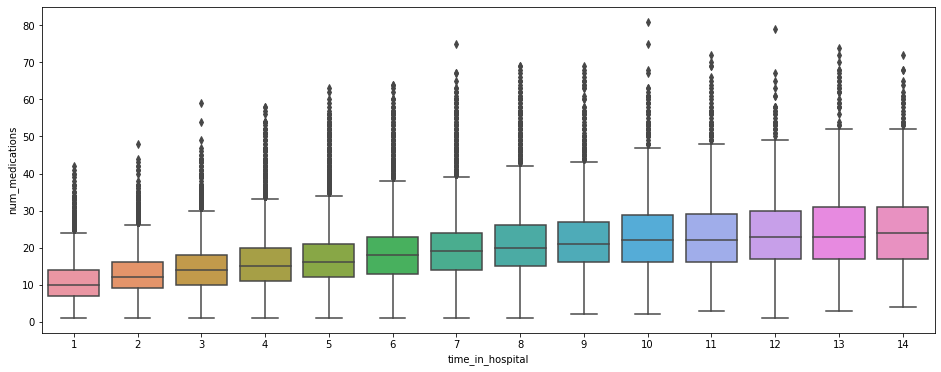

In [9]:
plt.figure(figsize=(16, 6))
sns.boxplot(x = df['time_in_hospital'], y = df['num_medications'])
plt.show()

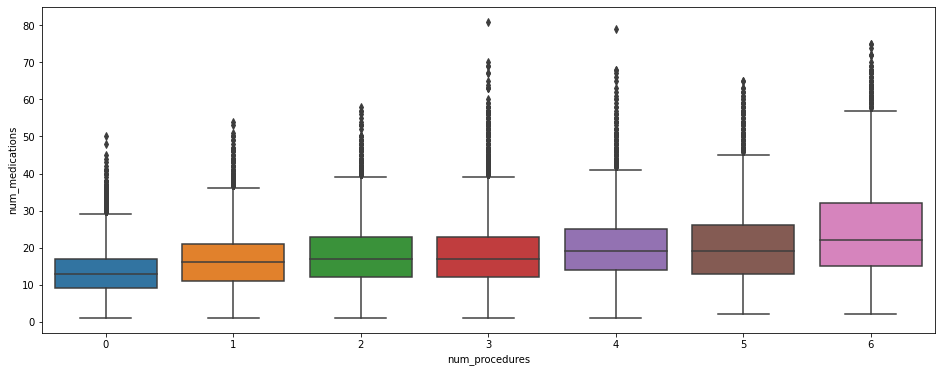

In [10]:
plt.figure(figsize=(16, 6))
sns.boxplot(x = df['num_procedures'], y = df['num_medications'])
plt.show()

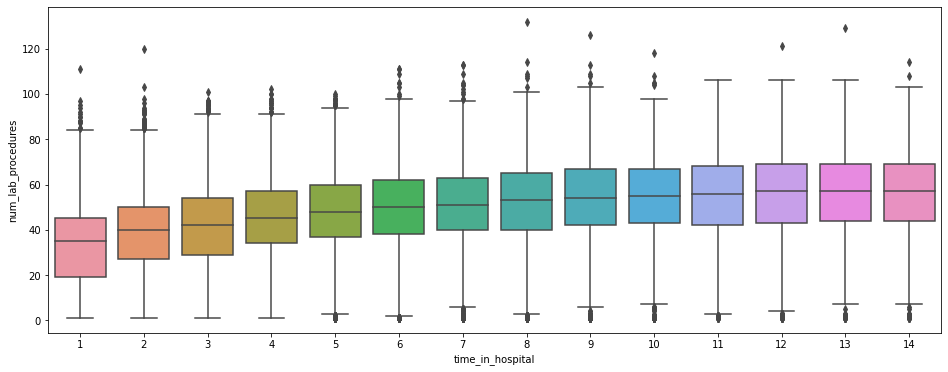

In [11]:
plt.figure(figsize=(16, 6))
sns.boxplot(x = df['time_in_hospital'], y = df['num_lab_procedures'])
plt.show()

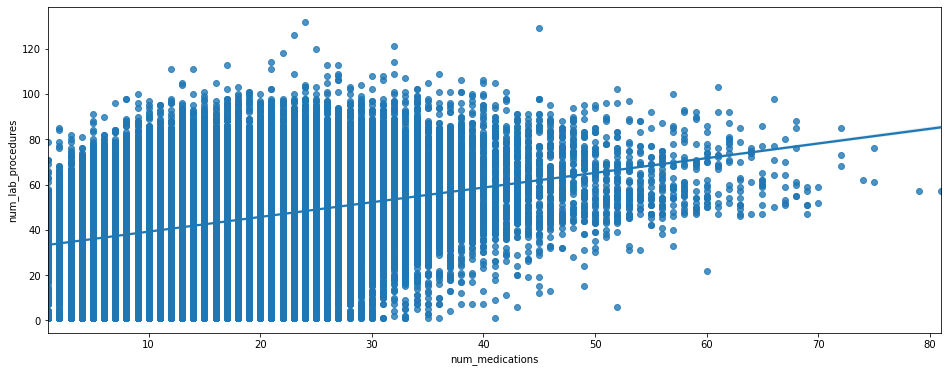

In [12]:
plt.figure(figsize=(16, 6))
sns.regplot(x = df['num_medications'], y = df['num_lab_procedures'])
plt.show()

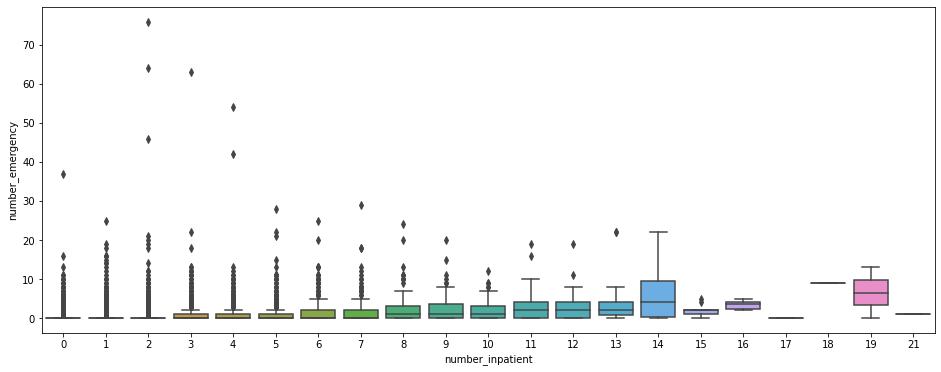

In [13]:
plt.figure(figsize=(16, 6))
sns.boxplot(y = df['number_emergency'], x = df['number_inpatient'])
plt.show()

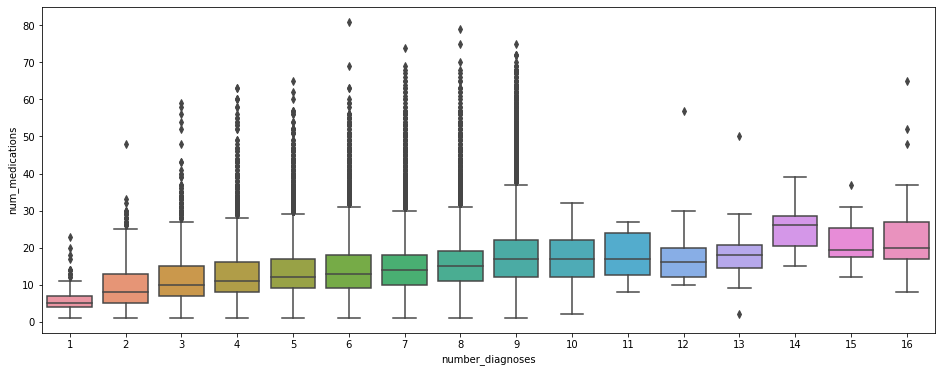

In [14]:
plt.figure(figsize=(16, 6))
sns.boxplot(x = df['number_diagnoses'], y = df['num_medications'])
plt.show()

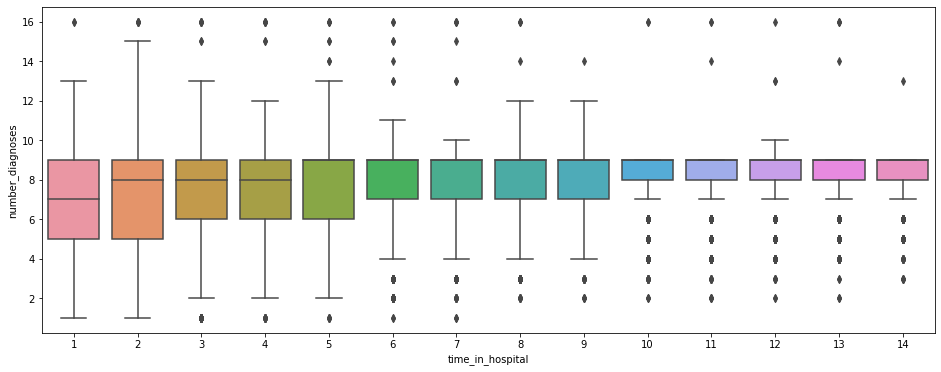

In [15]:
plt.figure(figsize=(16, 6))
sns.boxplot(x = df['time_in_hospital'], y = df['number_diagnoses'])
plt.show()

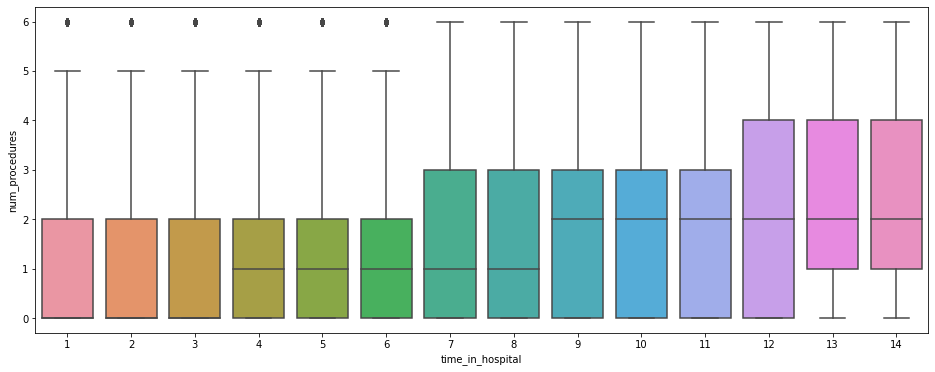

In [16]:
plt.figure(figsize=(16, 6))
sns.boxplot(x = df['time_in_hospital'], y = df['num_procedures'])
plt.show()

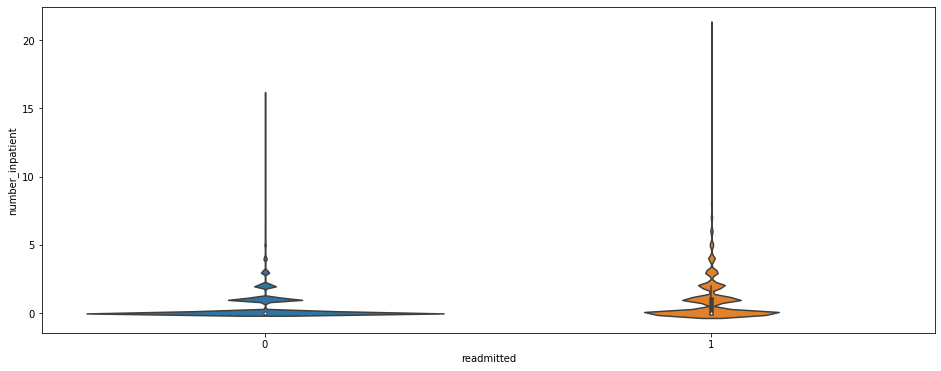

In [17]:
plt.figure(figsize=(16, 6))
sns.violinplot(x = df['readmitted'], y = df['number_inpatient'])
plt.show()

## Analiza jednowymiarowa, czyszczenie danych, wybór zmiennych i feature engineering.
## Wpływ zmiennych na zmienną readmitted

### encounter_id

In [18]:
df['encounter_id'].unique().size == df.shape[0]

True

Przyjęcia nie powtarzają się. Możemy więc usunąć kolumnę encounter_id.

In [19]:
df = df.drop(['encounter_id'], axis=1)

### patient_nbr

In [20]:
(df['patient_nbr'].value_counts()>1).sum()

16773

Prawie 17 tysięcy pacjentów zostało przyjętych kilkukrotnie. Stwórzmy kolumnę mówiącą o tym, czy pacjent był przyjmowany kilkukrotnie.

In [21]:
df['count'] = df.groupby('patient_nbr')['patient_nbr'].transform('count')
df["multiple_times"] = np.where(df['count'] > 1, 1, 0)
df = df.drop(['patient_nbr','count'], axis=1)

C:\Users\ltoma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


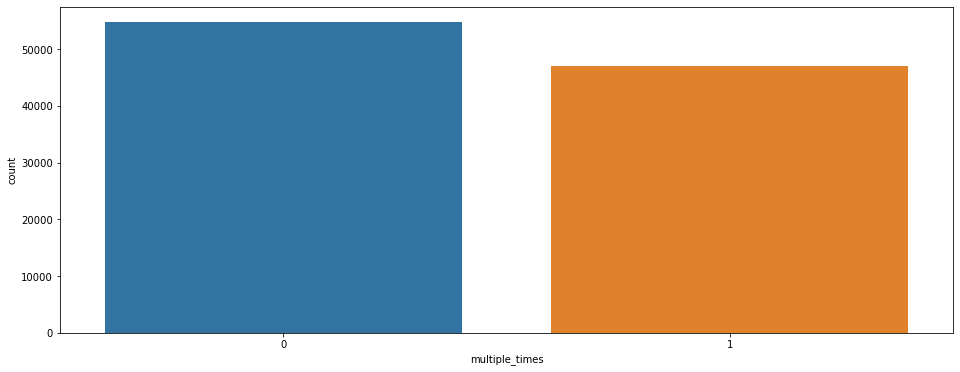

In [22]:
plt.figure(figsize=(16, 6))
sns.countplot(df['multiple_times'])
plt.show()

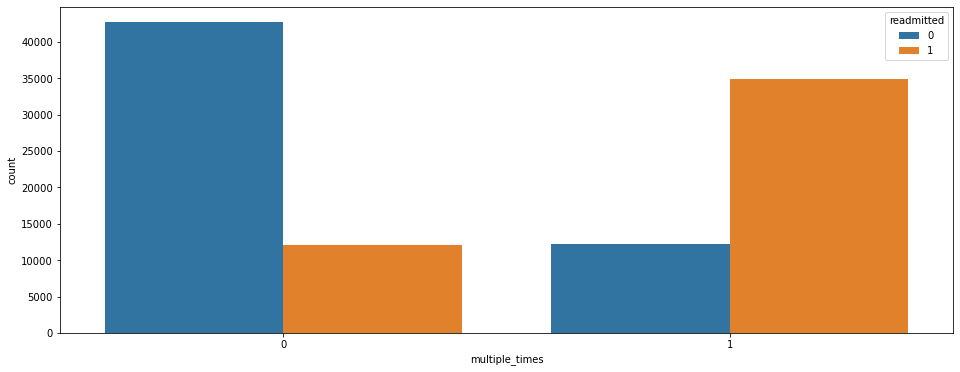

In [23]:
plt.figure(figsize=(16, 6))
sns.countplot(x="multiple_times", hue="readmitted", data=df)
plt.show()

### race 

In [24]:
df['race'].value_counts()

Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

Możemy zauważyć, że rasa niektórych pacjentów została oznaczona jako "nieznana", a innych jako "inna". Zmieńmy zatem rasę nieznaną na rasę inną.

In [25]:
df.loc[df.race == "?", 'race'] = "Other"

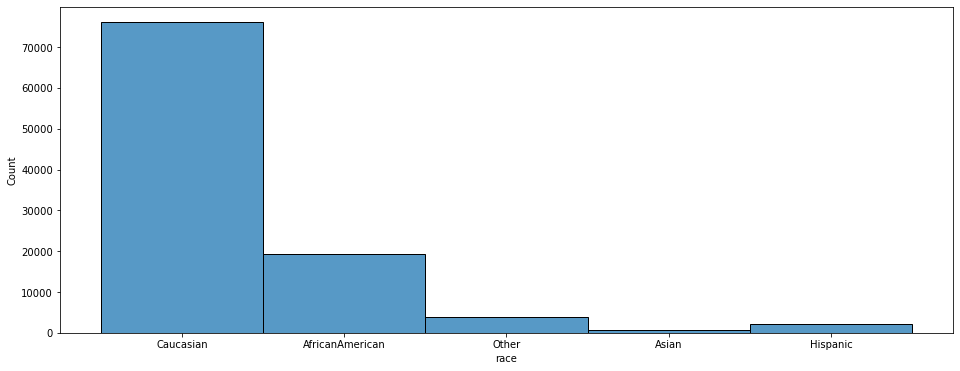

In [26]:
plt.figure(figsize=(16, 6))
sns.histplot(df['race'])
plt.show()

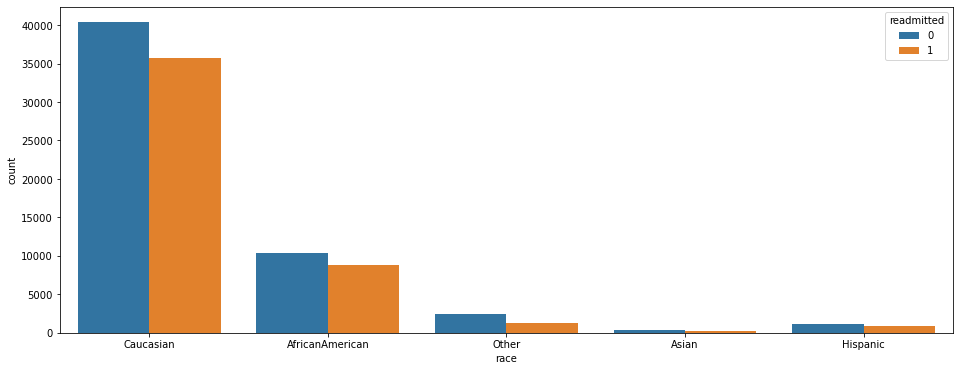

In [27]:
plt.figure(figsize=(16, 6))
sns.countplot(x="race", hue="readmitted", data=df)
plt.show()

Wykonajmy encoding.

In [28]:
df = pd.get_dummies(df, columns=["race"])

### gender

In [29]:
df['gender'].value_counts()

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

Mamy 3 rekordy, które nie określają płci. Wyrzućmy je więc.

In [30]:
df = df.drop(df[df.gender == "Unknown/Invalid"].index)

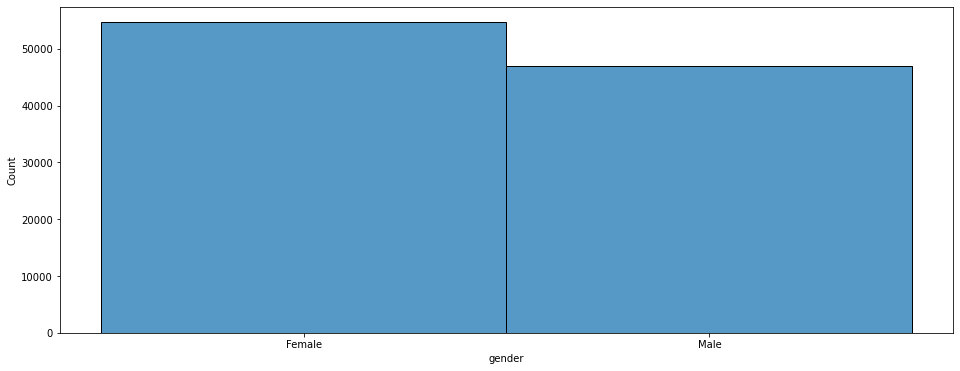

In [31]:
plt.figure(figsize=(16, 6))
sns.histplot(df['gender'])
plt.show()

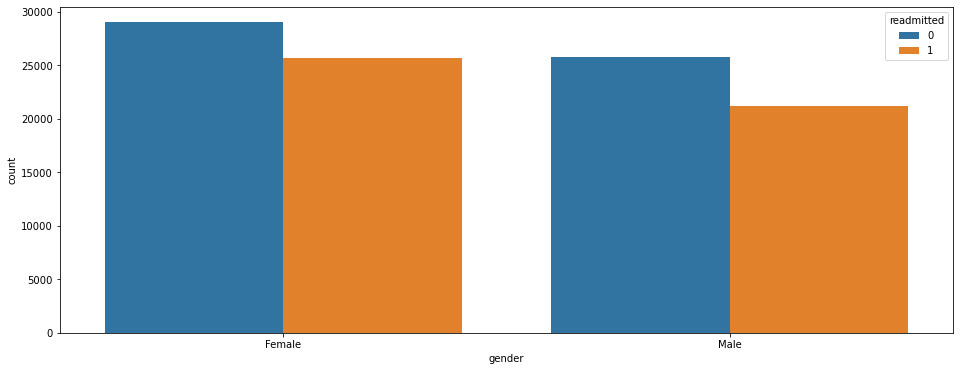

In [32]:
plt.figure(figsize=(16, 6))
sns.countplot(x="gender", hue="readmitted", data=df)
plt.show()

In [33]:
df = pd.get_dummies(df, columns=["gender"])

### age

In [34]:
df['age'].value_counts()

[70-80)     26066
[60-70)     22482
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64

Zamieńmy przedziały wiekowe na średnią. 

In [35]:
df.loc[df['age'] == "[0-10)",'age'] = 5
df.loc[df['age'] == "[10-20)",'age'] = 15
df.loc[df['age'] == "[20-30)",'age'] = 25
df.loc[df['age'] == "[30-40)",'age'] = 35
df.loc[df['age'] == "[40-50)",'age'] = 45
df.loc[df['age'] == "[50-60)",'age'] = 55
df.loc[df['age'] == "[60-70)",'age'] = 65
df.loc[df['age'] == "[70-80)",'age'] = 75
df.loc[df['age'] == "[80-90)",'age'] = 85
df.loc[df['age'] == "[90-100)",'age'] = 95
df['age'] = df['age'].astype('int64')

C:\Users\ltoma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


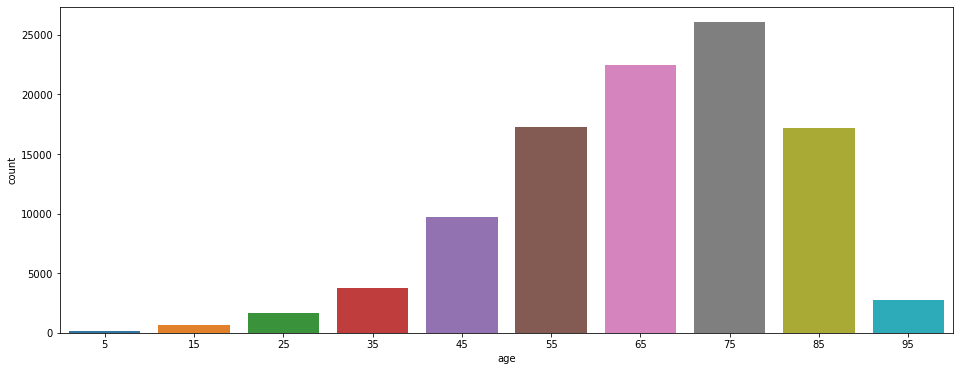

In [36]:
plt.figure(figsize=(16, 6))
sns.countplot(df['age'])
plt.show()

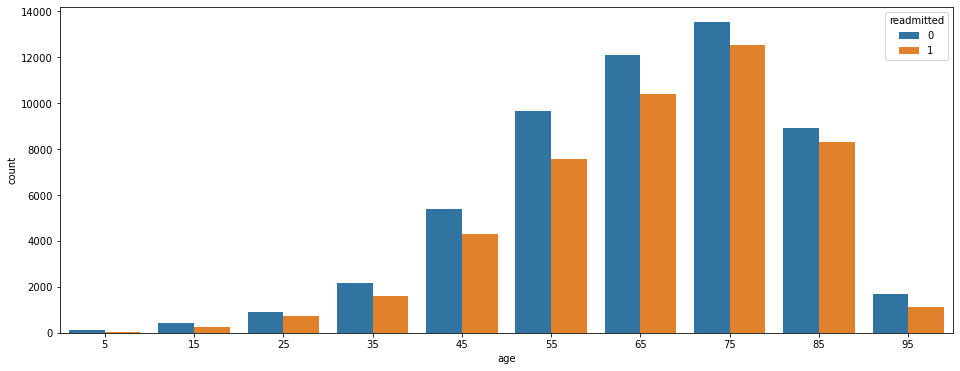

In [37]:
plt.figure(figsize=(16, 6))
sns.countplot(x="age", hue="readmitted", data=df)
plt.show()

### weight

In [38]:
df['weight'].value_counts()

?            98566
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64

Waga wpisana jest tylko dla niewielkiej ilości pacjentów. Dlatego pozbędziemy się tej kolumny.

In [39]:
df = df.drop(['weight'], axis=1)

### admission_type_id

In [40]:
df['admission_type_id'].value_counts()

1    53988
3    18868
2    18480
6     5291
5     4785
8      320
7       21
4       10
Name: admission_type_id, dtype: int64

C:\Users\ltoma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


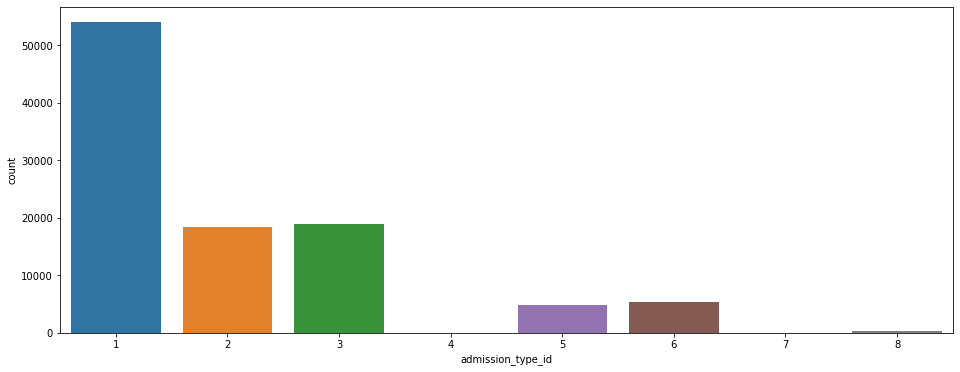

In [41]:
plt.figure(figsize=(16, 6))
sns.countplot(df['admission_type_id'])
plt.show()

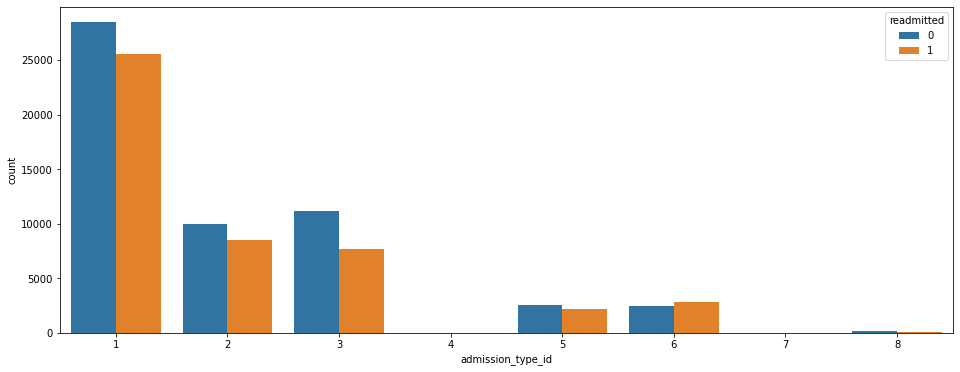

In [42]:
plt.figure(figsize=(16, 6))
sns.countplot(x="admission_type_id", hue="readmitted", data=df)
plt.show()

In [43]:
df = pd.get_dummies(df, columns=["admission_type_id"])

### discharge_disposition_id

In [44]:
df['discharge_disposition_id'].value_counts()

1     60232
3     13954
6     12902
18     3691
2      2128
22     1992
11     1642
5      1184
25      989
4       815
7       623
23      412
13      399
14      372
28      139
8       108
15       63
24       48
9        21
17       14
16       11
19        8
10        6
27        5
12        3
20        2
Name: discharge_disposition_id, dtype: int64

C:\Users\ltoma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


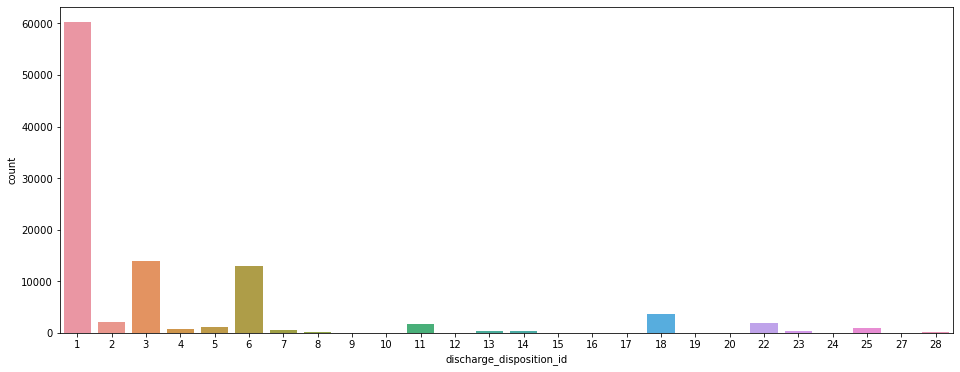

In [45]:
plt.figure(figsize=(16, 6))
sns.countplot(df['discharge_disposition_id'])
plt.show()

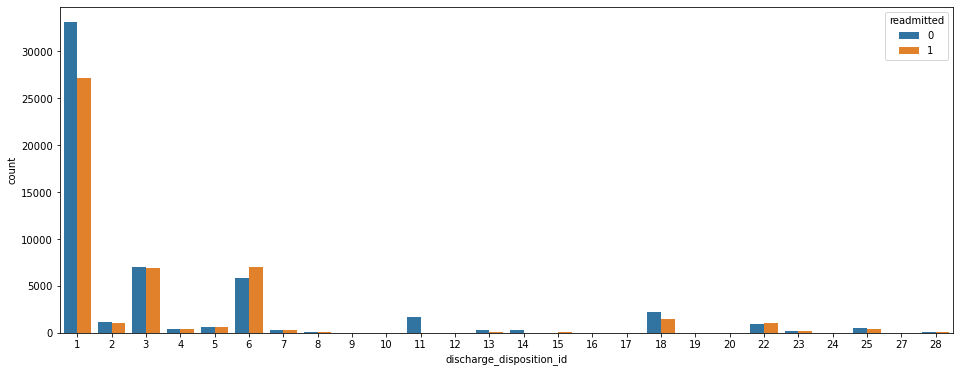

In [46]:
plt.figure(figsize=(16, 6))
sns.countplot(x="discharge_disposition_id", hue="readmitted", data=df)
plt.show()

In [47]:
df = pd.get_dummies(df, columns=["discharge_disposition_id"])

### admission_source_id

In [48]:
df['admission_source_id'].value_counts()

7     57492
1     29564
17     6781
4      3187
6      2264
2      1104
5       855
3       187
20      161
9       125
8        16
22       12
10        8
11        2
14        2
25        2
13        1
Name: admission_source_id, dtype: int64

C:\Users\ltoma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


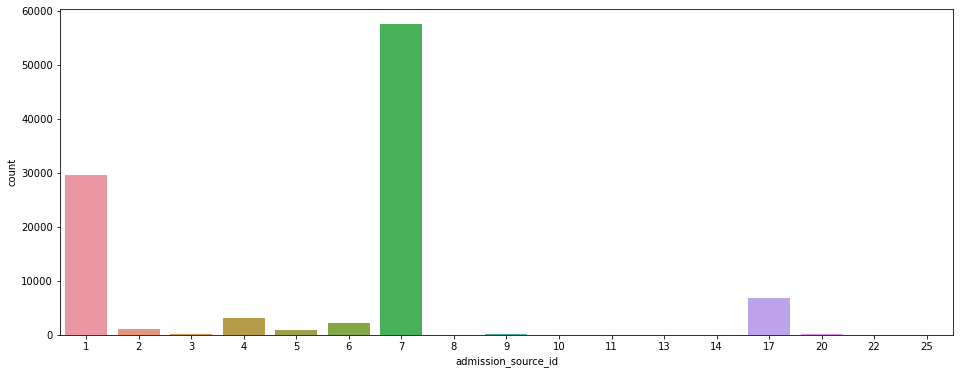

In [49]:
plt.figure(figsize=(16, 6))
sns.countplot(df['admission_source_id'])
plt.show()

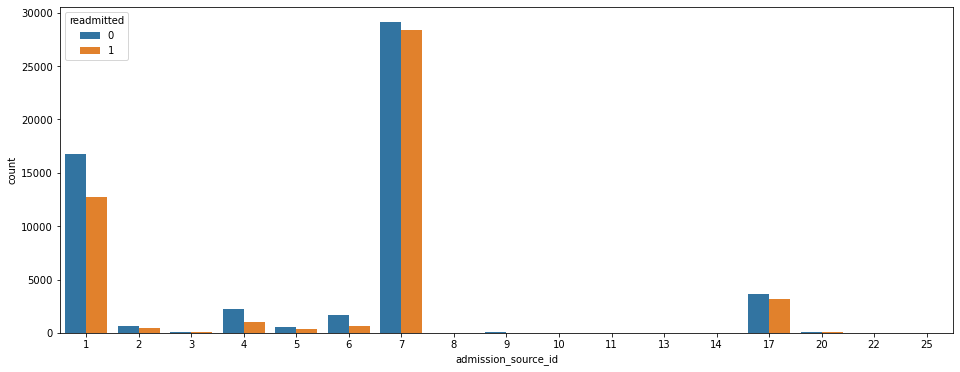

In [50]:
plt.figure(figsize=(16, 6))
sns.countplot(x="admission_source_id", hue="readmitted", data=df)
plt.show()

In [51]:
df = pd.get_dummies(df, columns=["admission_source_id"])

### time_in_hospital

In [52]:
df['time_in_hospital'].value_counts()

3     17756
2     17224
1     14206
4     13924
5      9966
6      7539
7      5859
8      4390
9      3002
10     2342
11     1855
12     1448
13     1210
14     1042
Name: time_in_hospital, dtype: int64

C:\Users\ltoma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


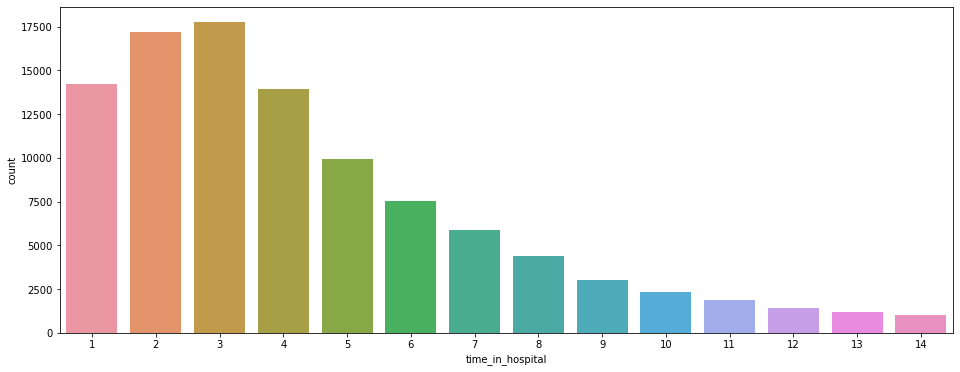

In [53]:
plt.figure(figsize=(16, 6))
sns.countplot(df['time_in_hospital'])
plt.show()

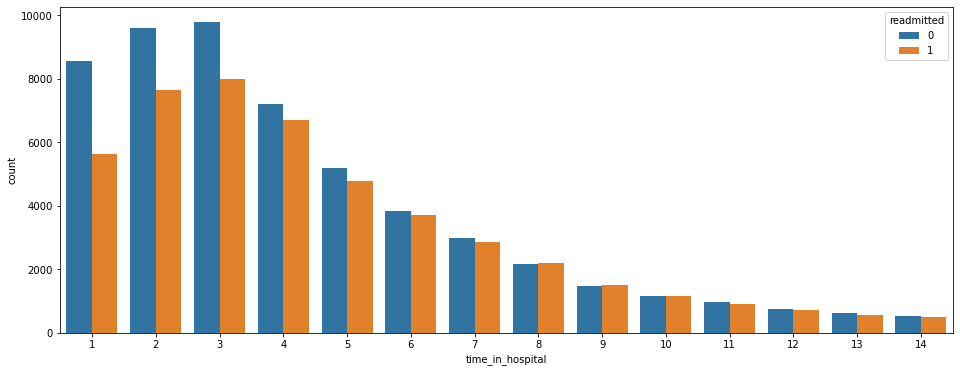

In [54]:
plt.figure(figsize=(16, 6))
sns.countplot(x="time_in_hospital", hue="readmitted", data=df)
plt.show()

### payer_code

In [55]:
df['payer_code'].value_counts()

?     40255
MC    32439
HM     6274
SP     5007
BC     4655
MD     3532
CP     2531
UN     2448
CM     1937
OG     1033
PO      592
DM      549
CH      146
WC      135
OT       95
MP       79
SI       55
FR        1
Name: payer_code, dtype: int64

Nie mamy danych dla prawie połowy pacjentów, więc wyrzućmy tę kolumnę.

In [56]:
df = df.drop(['payer_code'], axis=1)

### medical_specialty

In [57]:
df['medical_specialty'].value_counts()

?                                49947
InternalMedicine                 14635
Emergency/Trauma                  7565
Family/GeneralPractice            7440
Cardiology                        5351
                                 ...  
Speech                               1
Pediatrics-InfectiousDiseases        1
Proctology                           1
Psychiatry-Addictive                 1
Neurophysiology                      1
Name: medical_specialty, Length: 73, dtype: int64

Nie mamy danych dla prawie połowy pacjentów, więc wyrzućmy tę kolumnę.

In [58]:
df = df.drop(['medical_specialty'], axis=1)

### num_lab_procedures

In [59]:
df['num_lab_procedures'].value_counts()

1      3208
43     2804
44     2496
45     2376
38     2212
       ... 
121       1
107       1
129       1
126       1
132       1
Name: num_lab_procedures, Length: 118, dtype: int64

In [60]:
df['num_lab_procedures'].describe()

count    101763.000000
mean         43.095909
std          19.674220
min           1.000000
25%          31.000000
50%          44.000000
75%          57.000000
max         132.000000
Name: num_lab_procedures, dtype: float64

C:\Users\ltoma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


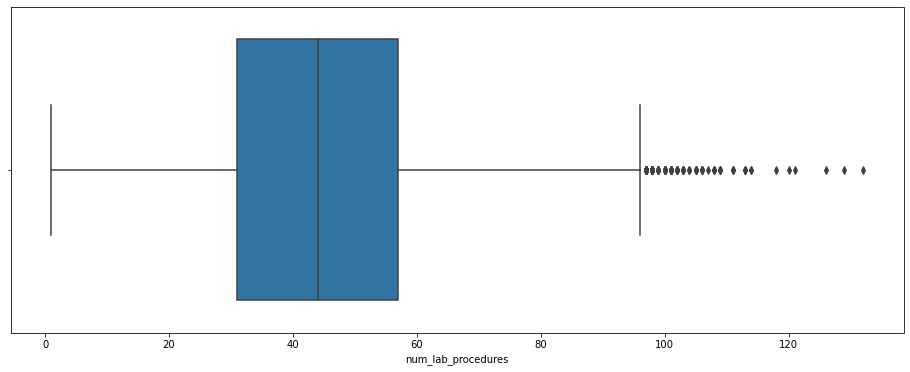

In [61]:
plt.figure(figsize=(16, 6))
sns.boxplot(df['num_lab_procedures'])
plt.show()

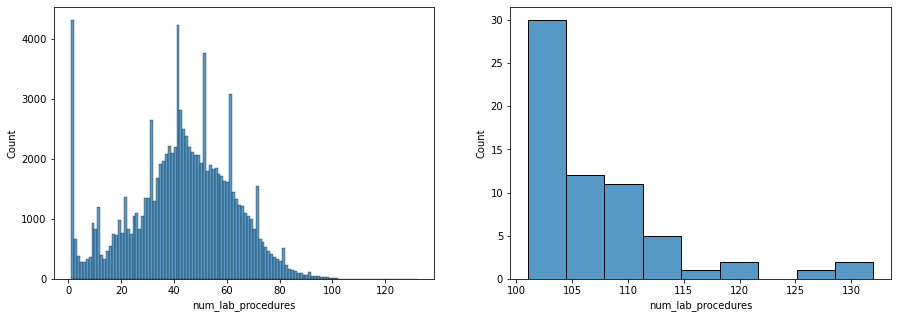

In [62]:
fig, axs = plt.subplots(ncols=2, figsize = (15,5))
sns.histplot(df['num_lab_procedures'],ax=axs[0])
sns.histplot((df.loc[df['num_lab_procedures'] > 100])['num_lab_procedures'],ax=axs[1])

plt.show()

Wartości powyżej 120 należy uważać za outliery. Zdyskretyzujmy zmienną.

<Figure size 1152x432 with 0 Axes>

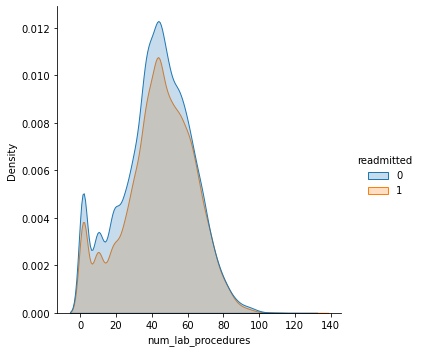

In [63]:
plt.figure(figsize=(16, 6))
sns.displot(df, x="num_lab_procedures", hue="readmitted", kind="kde", fill = True)
plt.show()

### num_procedures

In [64]:
df['num_procedures'].value_counts()

0    46652
1    20741
2    12716
3     9443
6     4954
4     4180
5     3077
Name: num_procedures, dtype: int64

In [65]:
df['num_procedures'].describe()

count    101763.000000
mean          1.339691
std           1.705792
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max           6.000000
Name: num_procedures, dtype: float64

C:\Users\ltoma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


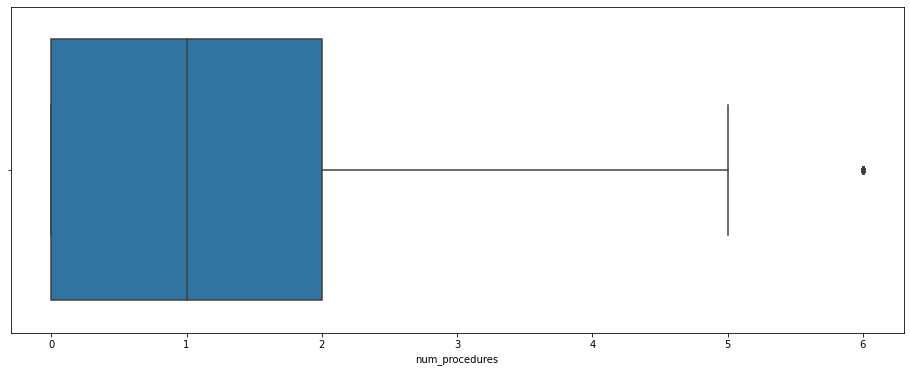

In [66]:
plt.figure(figsize=(16, 6))
sns.boxplot(df['num_procedures'])
plt.show()

C:\Users\ltoma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


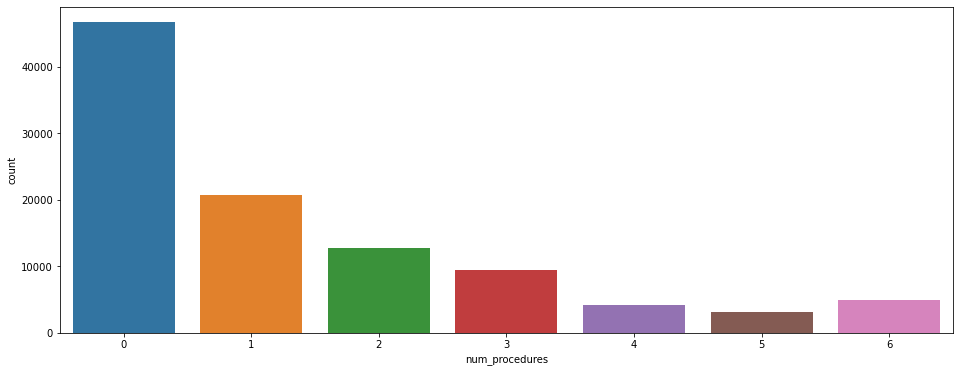

In [67]:
plt.figure(figsize=(16, 6))
sns.countplot(df['num_procedures'])
plt.show()

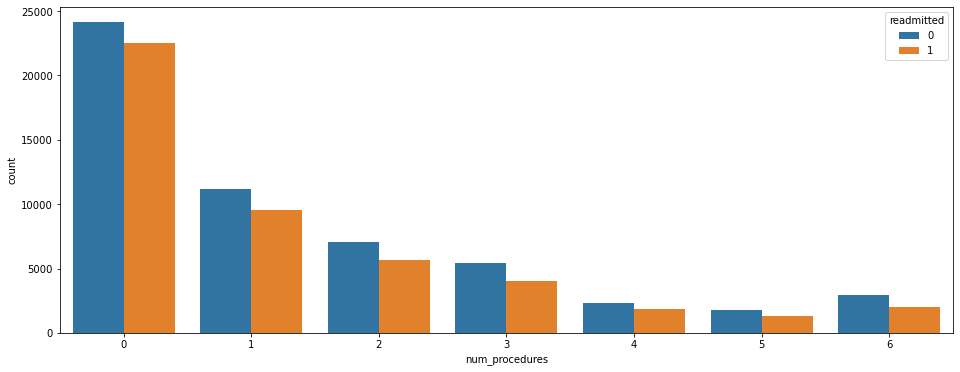

In [68]:
plt.figure(figsize=(16, 6))
sns.countplot(x="num_procedures", hue="readmitted", data=df)
plt.show()

### num_medications

In [69]:
df['num_medications'].value_counts()

13    6086
12    6004
11    5795
15    5792
14    5707
      ... 
75       2
70       2
81       1
79       1
74       1
Name: num_medications, Length: 75, dtype: int64

C:\Users\ltoma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


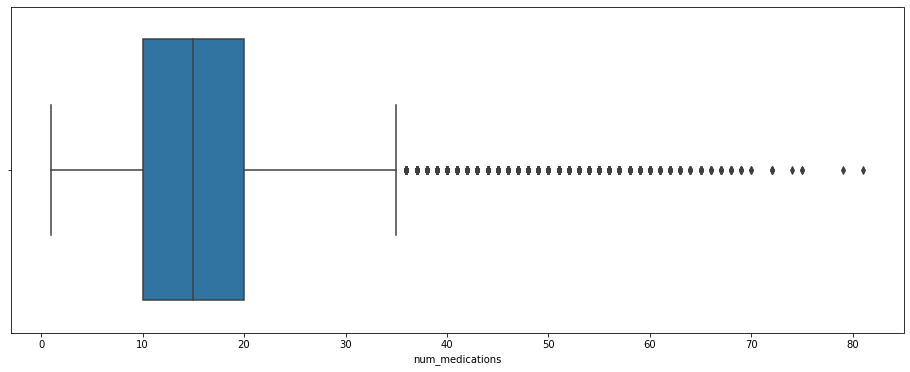

In [70]:
plt.figure(figsize=(16, 6))
sns.boxplot(df['num_medications'])
plt.show()

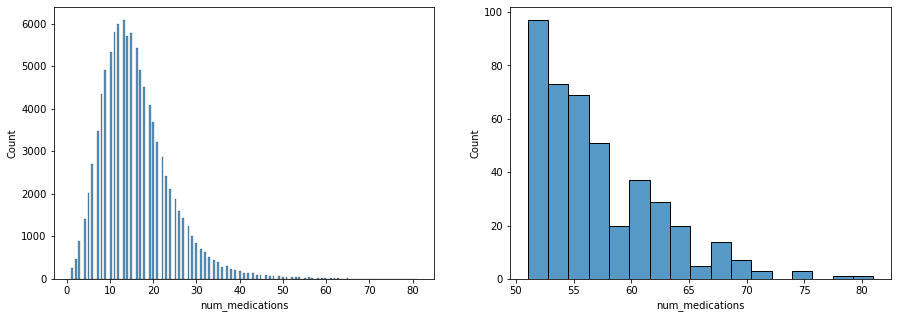

In [71]:
fig, axs = plt.subplots(ncols=2, figsize = (15,5))
sns.histplot(df['num_medications'],ax=axs[0])
sns.histplot((df.loc[df['num_medications'] > 50])['num_medications'],ax=axs[1])
plt.show()

Wartości powyżej 70 są outlierami.

<Figure size 1152x432 with 0 Axes>

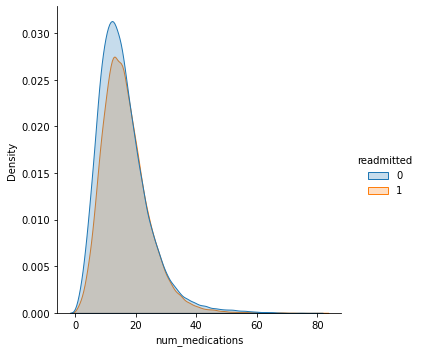

In [72]:
plt.figure(figsize=(16, 6))
sns.displot(df, x="num_medications", hue="readmitted", kind="kde", fill = True)
plt.show()

### number_outpatient

In [73]:
df['number_outpatient'].value_counts()

0     85024
1      8547
2      3594
3      2042
4      1099
5       533
6       303
7       155
8        98
9        83
10       57
11       42
13       31
12       30
14       28
15       20
16       15
17        8
20        7
21        7
18        5
22        5
24        3
27        3
19        3
25        2
26        2
23        2
29        2
33        2
35        2
36        2
28        1
34        1
37        1
38        1
39        1
40        1
42        1
Name: number_outpatient, dtype: int64

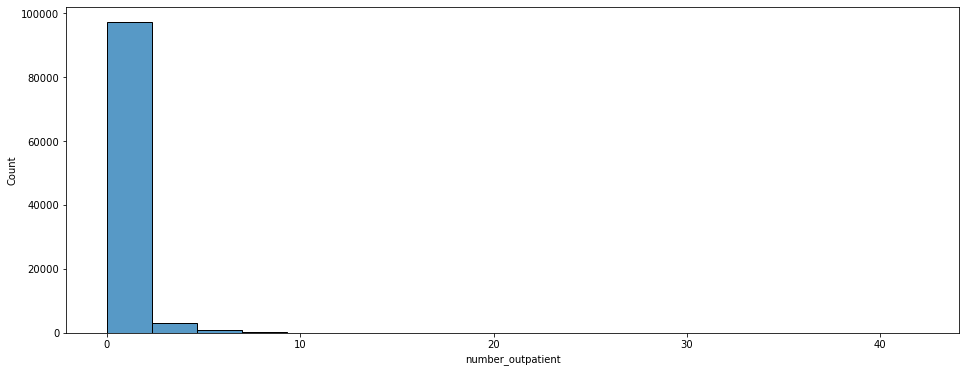

In [74]:
plt.figure(figsize=(16, 6))
sns.histplot(df['number_outpatient'])
plt.show()

Większość osób nie była odwiedzana ambulatoryjnie. Bardzo mała ilość była odwiedzana częściej niż 4 razy. Zdyskretyzujmy zatem naszą zmienną.

In [75]:
df.loc[df['number_outpatient'].between(1, 4, inclusive='both'),'number_outpatient'] = 1
df.loc[df['number_outpatient'] > 4,'number_outpatient'] = 2

C:\Users\ltoma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


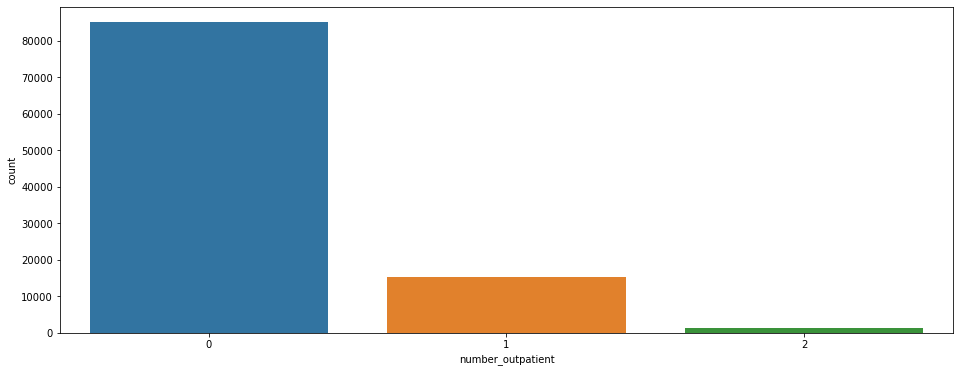

In [76]:
plt.figure(figsize=(16, 6))
sns.countplot(df['number_outpatient'])
plt.show()

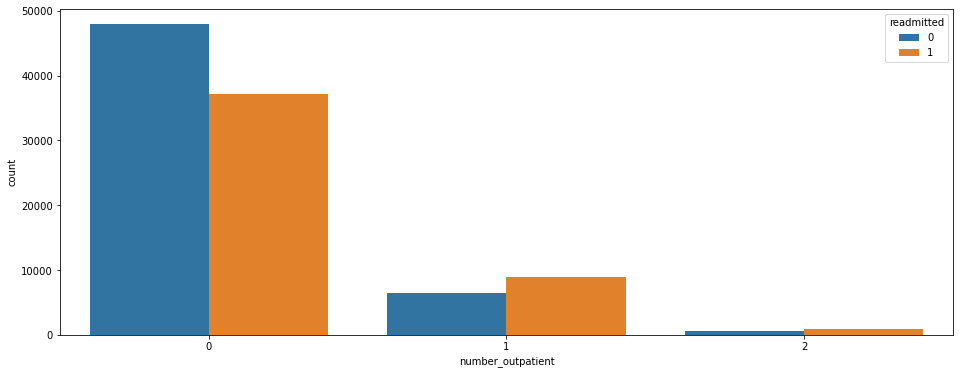

In [77]:
plt.figure(figsize=(16, 6))
sns.countplot(x="number_outpatient", hue="readmitted", data=df)
plt.show()

### number_emergency

In [78]:
df['number_emergency'].value_counts()

0     90380
1      7677
2      2042
3       725
4       374
5       192
6        94
7        73
8        50
10       34
9        33
11       23
13       12
12       10
22        6
18        5
16        5
20        4
19        4
14        3
15        3
21        2
25        2
64        1
76        1
24        1
28        1
29        1
37        1
42        1
46        1
54        1
63        1
Name: number_emergency, dtype: int64

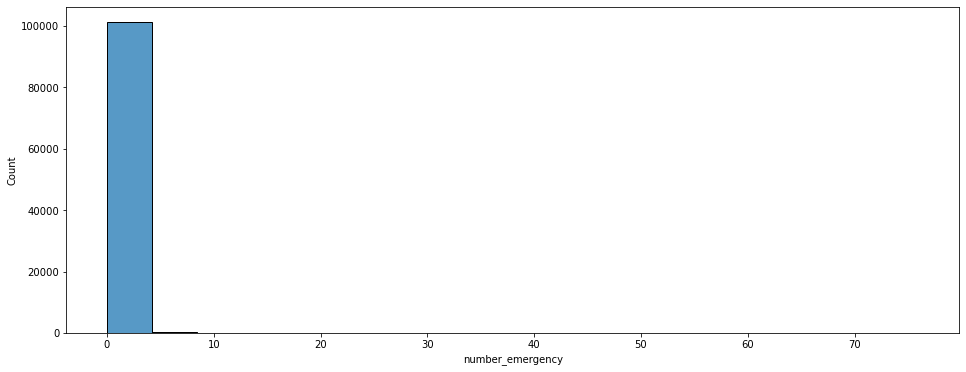

In [79]:
plt.figure(figsize=(16, 6))
sns.histplot(df['number_emergency'])
plt.show()

Liczba nagłych wizyt wynosiła u większości 0.Zdyskretyzujmy naszą zmienną.

In [80]:
df.loc[df['number_emergency'].between(1, 2, inclusive='both'),'number_emergency'] = 1
df.loc[df['number_emergency'] > 2,'number_emergency'] = 2

C:\Users\ltoma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


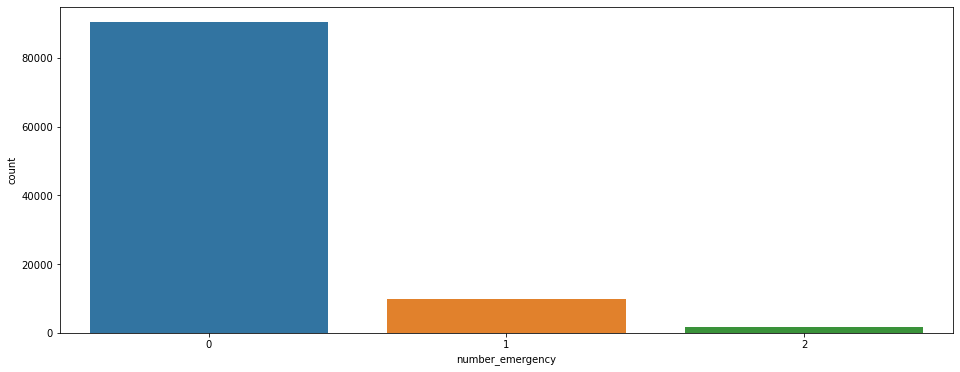

In [81]:
plt.figure(figsize=(16, 6))
sns.countplot(df['number_emergency'])
plt.show()

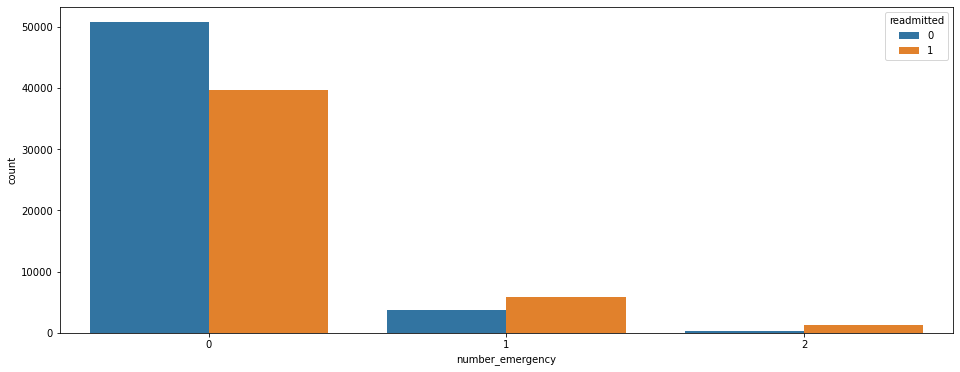

In [82]:
plt.figure(figsize=(16, 6))
sns.countplot(x="number_emergency", hue="readmitted", data=df)
plt.show()

### number_inpatient

In [83]:
df['number_inpatient'].value_counts()

0     67627
1     19521
2      7566
3      3411
4      1622
5       812
6       480
7       268
8       151
9       111
10       61
11       49
12       34
13       20
14       10
15        9
16        6
19        2
17        1
18        1
21        1
Name: number_inpatient, dtype: int64

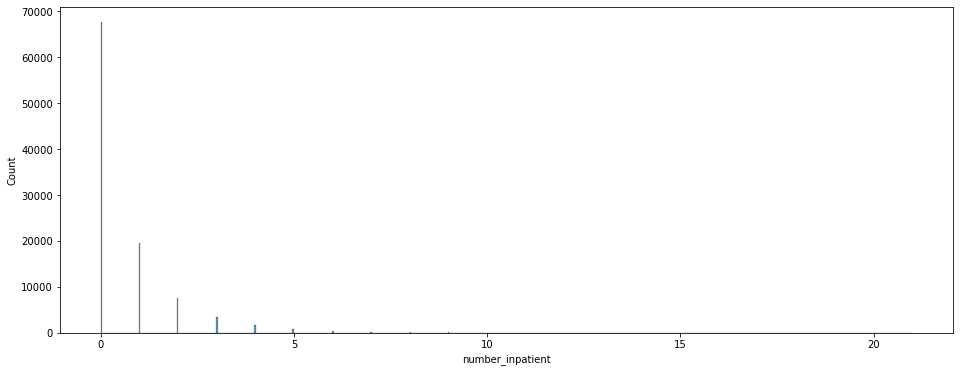

In [84]:
plt.figure(figsize=(16, 6))
sns.histplot(df['number_inpatient'])
plt.show()

In [85]:
df.loc[df['number_inpatient'].between(1, 4, inclusive='both'),'number_inpatient'] = 1
df.loc[df['number_inpatient'] > 4,'number_inpatient'] = 2

C:\Users\ltoma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


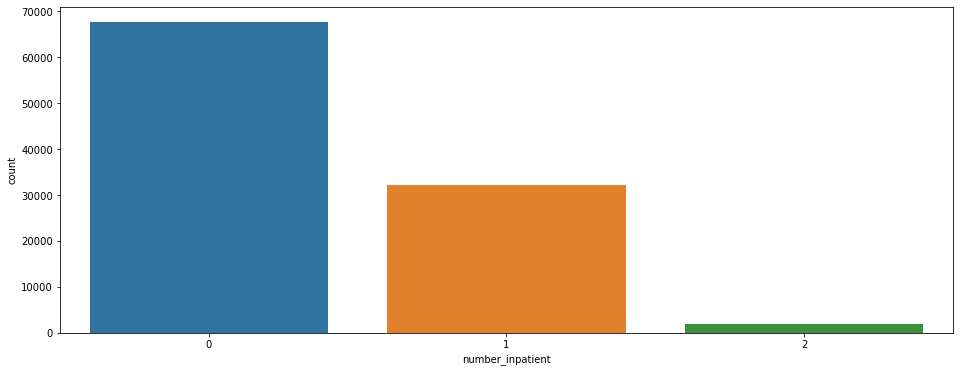

In [86]:
plt.figure(figsize=(16, 6))
sns.countplot(df['number_inpatient'])
plt.show()

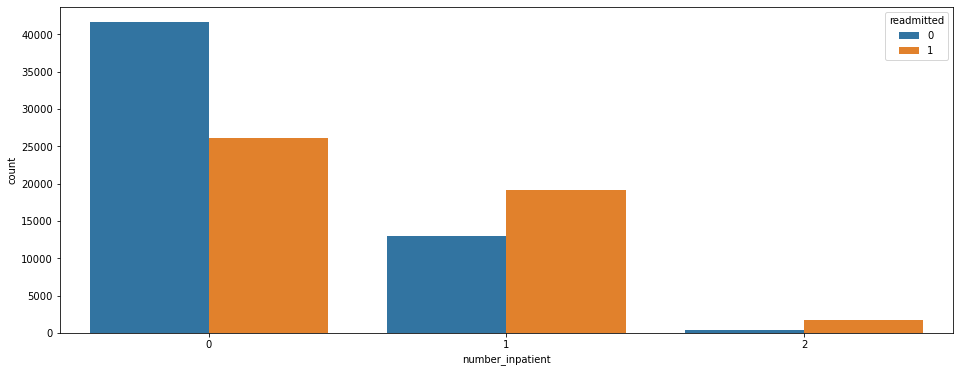

In [87]:
plt.figure(figsize=(16, 6))
sns.countplot(x="number_inpatient", hue="readmitted", data=df)
plt.show()

### diag_1

In [88]:
df['diag_1'].value_counts()

428    6862
414    6580
786    4016
410    3614
486    3508
       ... 
827       1
471       1
216       1
791       1
366       1
Name: diag_1, Length: 717, dtype: int64

In [89]:
df.loc[df['diag_1'].str.contains("[E-V]"),'diag_1'] = "0"
df.loc[df['diag_1'].str.contains("250"),'diag_1'] = "250"
df.loc[df['diag_1'].str.contains("\?"),'diag_1'] = "0"

In [90]:


df['diag_1'] = df['diag_1'].astype('int64')

df['diag_1'] = np.select(
    [
    df['diag_1'].between(390, 459, inclusive='both'),
        df['diag_1'] == 785,
        df['diag_1'] == 250,
        df['diag_1'].between(460, 519, inclusive='both'),
        df['diag_1'] == 786,
        df['diag_1'].between(520, 579, inclusive='both'),
        df['diag_1'] == 787,
        df['diag_1'].between(800, 999, inclusive='both'),
        df['diag_1'].between(710, 739, inclusive='both'),
        df['diag_1'].between(580, 629, inclusive='both'),
        df['diag_1'] == 788,
        df['diag_1'].between(140, 239, inclusive='both')
    ], 
    [
        'Circulatory',
        'Circulatory',
        'Diabetes',
        'Respiratory',
        'Respiratory',
        'Digestive',
        'Digestive',
        'Injury',
        'Musculoskeletal',
        'Genitourinary',
        'Genitourinary',
        'Neoplasms'
    ], 
    default='Other'
)

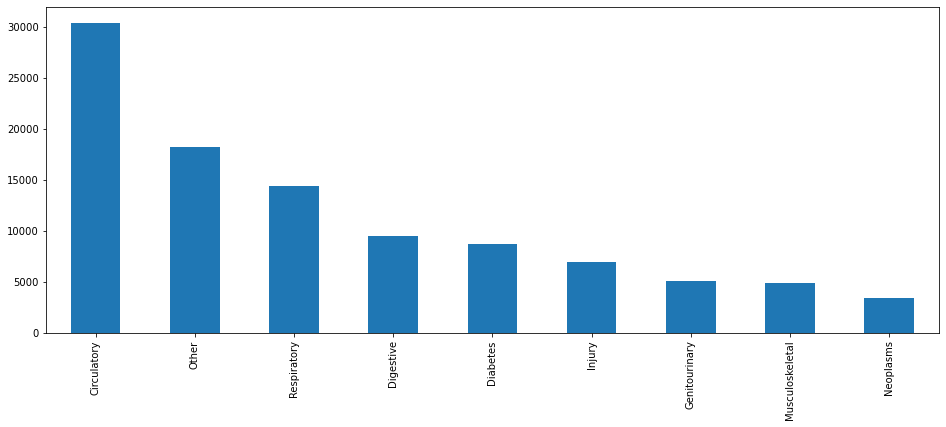

In [91]:
plt.figure(figsize=(16, 6))
df.diag_1.value_counts().plot(kind='bar')
plt.show()

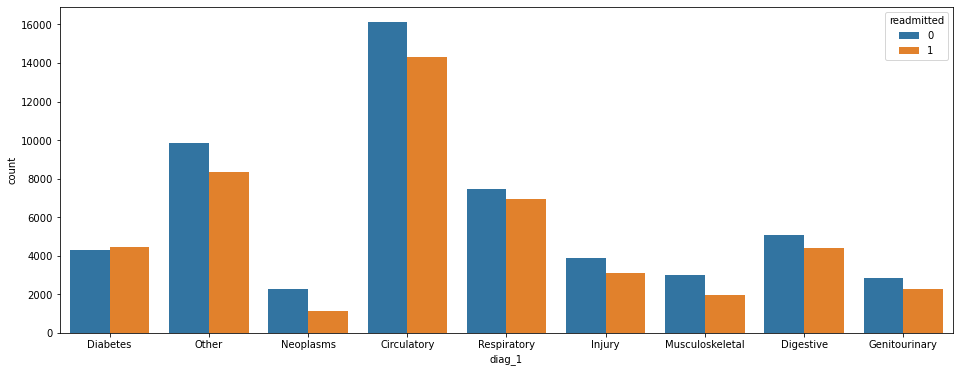

In [92]:
plt.figure(figsize=(16, 6))
sns.countplot(x="diag_1", hue="readmitted", data=df)
plt.show()

In [93]:
df = pd.get_dummies(df, columns=["diag_1"])

### diag_2

In [94]:
df['diag_2'].value_counts()

276    6752
428    6662
250    6071
427    5036
401    3736
       ... 
506       1
944       1
615       1
130       1
520       1
Name: diag_2, Length: 749, dtype: int64

In [95]:
df.loc[df['diag_2'].str.contains("[E-V]"),'diag_2'] = "0"
df.loc[df['diag_2'].str.contains("250"),'diag_2'] = "250"
df.loc[df['diag_2'].str.contains("\?"),'diag_2'] = "0"

In [96]:
df['diag_2'] = df['diag_2'].astype('int64')

df['diag_2'] = np.select(
    [
    df['diag_2'].between(390, 459, inclusive='both'),
        df['diag_2'] == 785,
        df['diag_2'] == 250,
        df['diag_2'].between(460, 519, inclusive='both'),
        df['diag_2'] == 786,
        df['diag_2'].between(520, 579, inclusive='both'),
        df['diag_2'] == 787,
        df['diag_2'].between(800, 999, inclusive='both'),
        df['diag_2'].between(710, 739, inclusive='both'),
        df['diag_2'].between(580, 629, inclusive='both'),
        df['diag_2'] == 788,
        df['diag_2'].between(140, 239, inclusive='both')
    ], 
    [
        'Circulatory',
        'Circulatory',
        'Diabetes',
        'Respiratory',
        'Respiratory',
        'Digestive',
        'Digestive',
        'Injury',
        'Musculoskeletal',
        'Genitourinary',
        'Genitourinary',
        'Neoplasms'
    ], 
    default='Other'
)

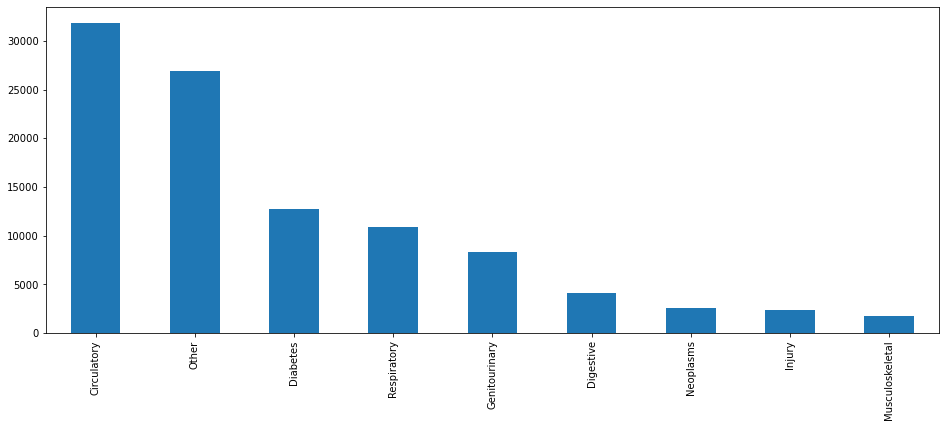

In [97]:
plt.figure(figsize=(16, 6))
df.diag_2.value_counts().plot(kind='bar')
plt.show()

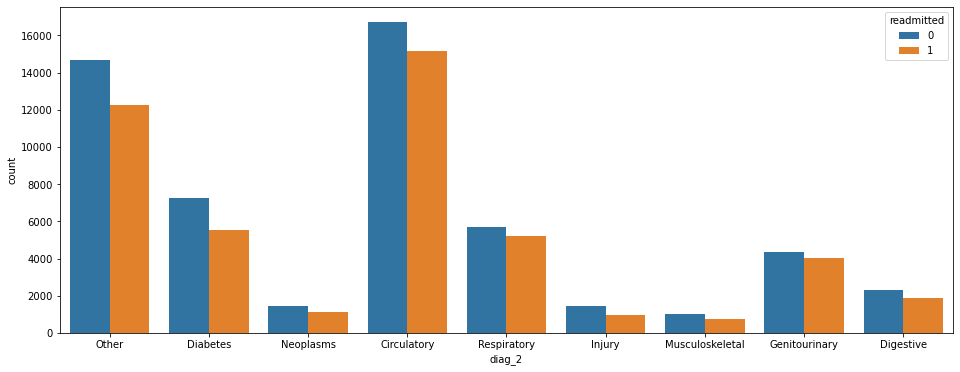

In [98]:
plt.figure(figsize=(16, 6))
sns.countplot(x="diag_2", hue="readmitted", data=df)
plt.show()

In [99]:
df = pd.get_dummies(df, columns=["diag_2"])

### diag_3

In [100]:
df['diag_3'].value_counts()

250    11555
401     8288
276     5175
428     4577
427     3955
       ...  
875        1
942        1
872        1
361        1
837        1
Name: diag_3, Length: 790, dtype: int64

In [101]:
df.loc[df['diag_3'].str.contains("[E-V]"),'diag_3'] = "0"
df.loc[df['diag_3'].str.contains("250"),'diag_3'] = "250"
df.loc[df['diag_3'].str.contains("365"),'diag_3'] = "365"
df.loc[df['diag_3'].str.contains("\?"),'diag_3'] = "0"

In [102]:
df['diag_3'] = df['diag_3'].astype('int64')

df['diag_3'] = np.select(
    [
    df['diag_3'].between(390, 459, inclusive='both'),
        df['diag_3'] == 785,
        df['diag_3'] == 250,
        df['diag_3'].between(460, 519, inclusive='both'),
        df['diag_3'] == 786,
        df['diag_3'].between(520, 579, inclusive='both'),
        df['diag_3'] == 787,
        df['diag_3'].between(800, 999, inclusive='both'),
        df['diag_3'].between(710, 739, inclusive='both'),
        df['diag_3'].between(580, 629, inclusive='both'),
        df['diag_3'] == 788,
        df['diag_3'].between(140, 239, inclusive='both')
    ], 
    [
        'Circulatory',
        'Circulatory',
        'Diabetes',
        'Respiratory',
        'Respiratory',
        'Digestive',
        'Digestive',
        'Injury',
        'Musculoskeletal',
        'Genitourinary',
        'Genitourinary',
        'Neoplasms'
    ], 
    default='Other'
)

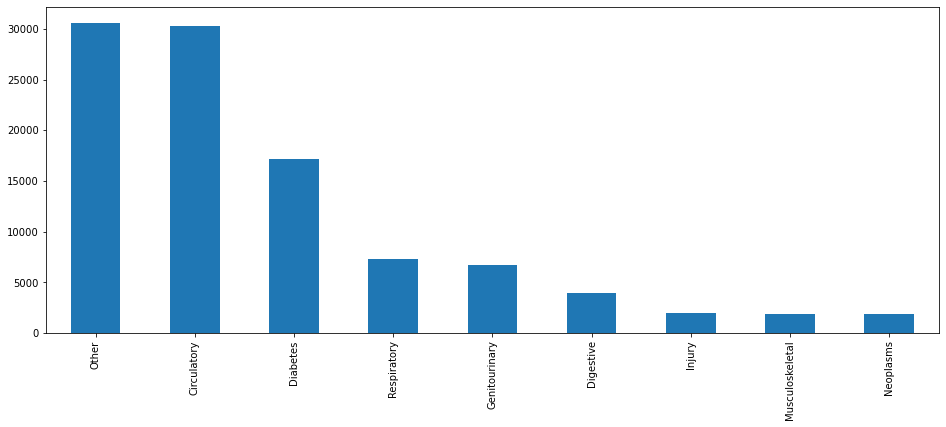

In [103]:
plt.figure(figsize=(16, 6))
df.diag_3.value_counts().plot(kind='bar')
plt.show()

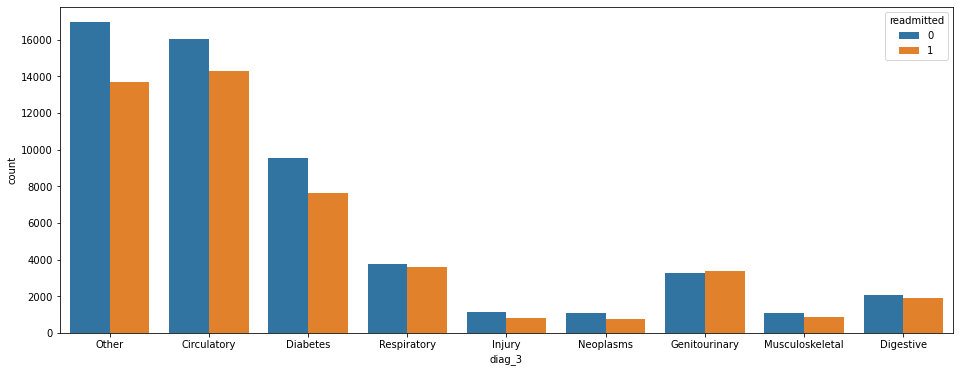

In [104]:
plt.figure(figsize=(16, 6))
sns.countplot(x="diag_3", hue="readmitted", data=df)
plt.show()

In [105]:
df = pd.get_dummies(df, columns=["diag_3"])

### number_diagnoses

In [106]:
df['number_diagnoses'].value_counts()

9     49473
5     11392
8     10616
7     10393
6     10161
4      5536
3      2835
2      1023
1       219
16       45
10       17
13       16
11       11
15       10
12        9
14        7
Name: number_diagnoses, dtype: int64

In [107]:
df['number_diagnoses'].describe()

count    101763.000000
mean          7.422649
std           1.933578
min           1.000000
25%           6.000000
50%           8.000000
75%           9.000000
max          16.000000
Name: number_diagnoses, dtype: float64

C:\Users\ltoma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


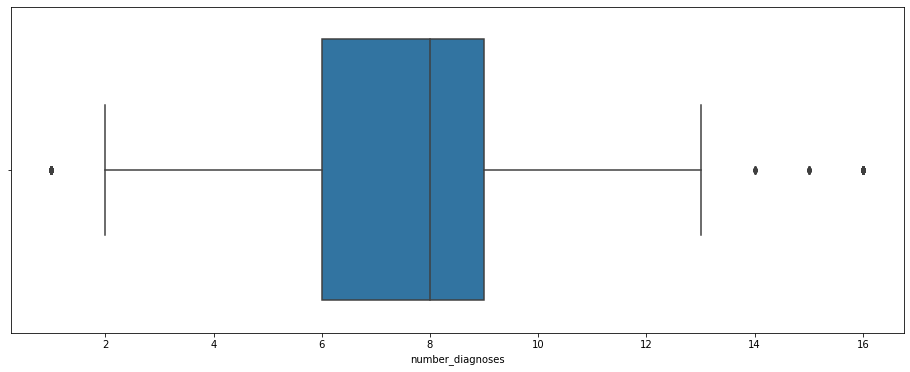

In [108]:
plt.figure(figsize=(16, 6))
sns.boxplot(df['number_diagnoses'])
plt.show()

C:\Users\ltoma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ltoma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


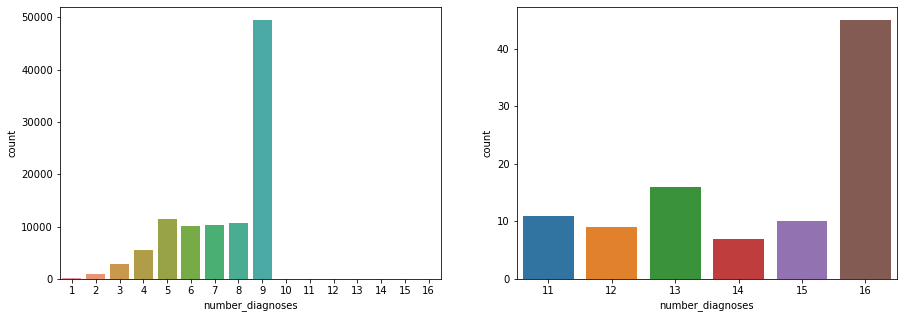

In [109]:
fig, axs = plt.subplots(ncols=2, figsize = (15,5))
sns.countplot(df['number_diagnoses'],ax=axs[0])
sns.countplot((df.loc[df['number_diagnoses'] > 10])['number_diagnoses'],ax=axs[1])
plt.show()

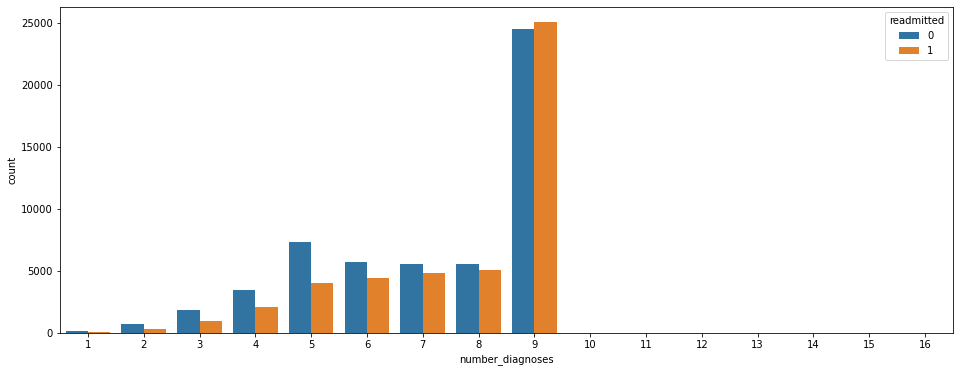

In [110]:
plt.figure(figsize=(16, 6))
sns.countplot(x="number_diagnoses", hue="readmitted", data=df)
plt.show()

### max_glu_serum

In [111]:
df['max_glu_serum'].value_counts()

None    96417
Norm     2597
>200     1485
>300     1264
Name: max_glu_serum, dtype: int64

In [112]:
df.loc[df['max_glu_serum'] == "None",'max_glu_serum'] = 0
df.loc[df['max_glu_serum'] == "Norm",'max_glu_serum'] = 1
df.loc[df['max_glu_serum'] == ">200",'max_glu_serum'] = 2
df.loc[df['max_glu_serum'] == ">300",'max_glu_serum'] = 3
df['max_glu_serum'] = df['max_glu_serum'].astype('int64')

C:\Users\ltoma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


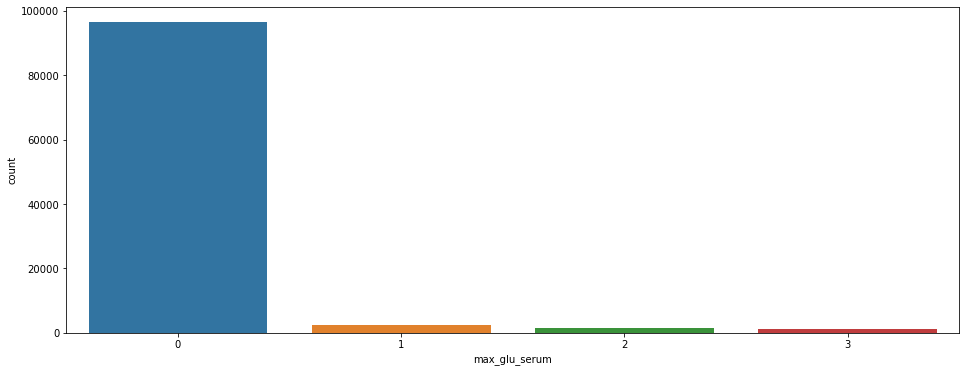

In [113]:
plt.figure(figsize=(16, 6))
sns.countplot(df['max_glu_serum'])
plt.show()

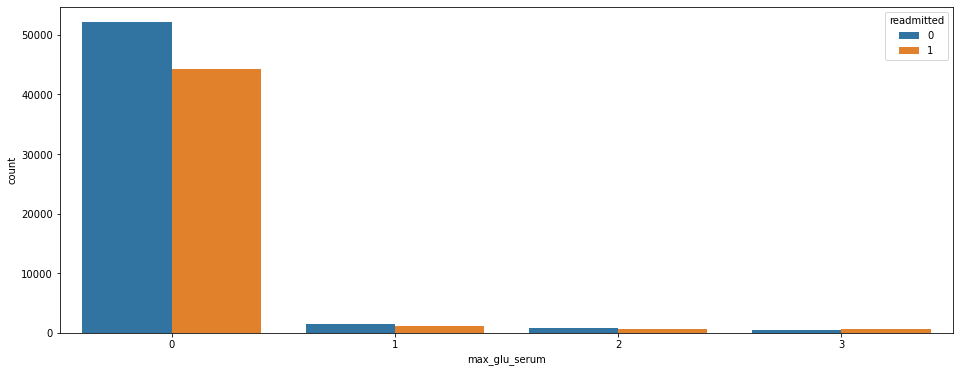

In [114]:
plt.figure(figsize=(16, 6))
sns.countplot(x="max_glu_serum", hue="readmitted", data=df)
plt.show()

### A1Cresult

In [115]:
df['A1Cresult'].value_counts()

None    84745
>8       8216
Norm     4990
>7       3812
Name: A1Cresult, dtype: int64

In [116]:
df.loc[df['A1Cresult'] == "None",'A1Cresult'] = 0
df.loc[df['A1Cresult'] == "Norm",'A1Cresult'] = 1
df.loc[df['A1Cresult'] == ">7",'A1Cresult'] = 2
df.loc[df['A1Cresult'] == ">8",'A1Cresult'] = 3
df['A1Cresult'] = df['A1Cresult'].astype('int64')

C:\Users\ltoma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


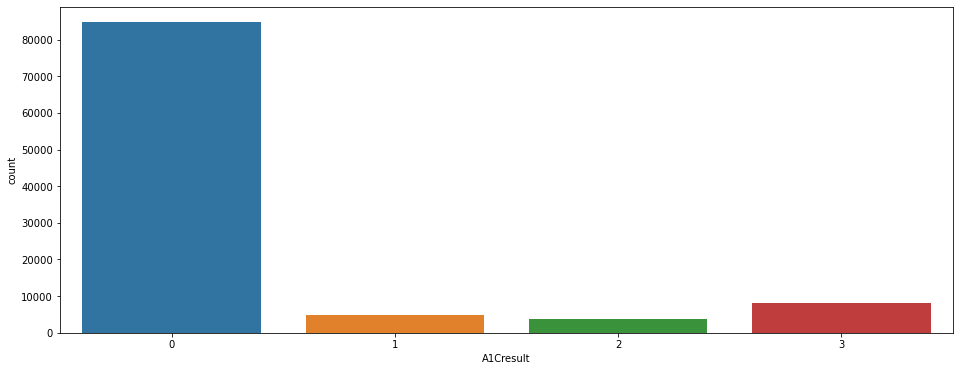

In [117]:
plt.figure(figsize=(16, 6))
sns.countplot(df['A1Cresult'])
plt.show()

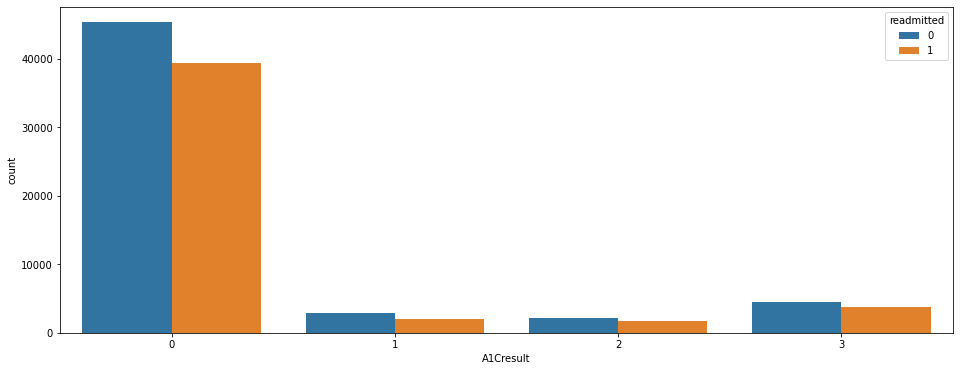

In [118]:
plt.figure(figsize=(16, 6))
sns.countplot(x="A1Cresult", hue="readmitted", data=df)
plt.show()

### drugs

In [119]:
names = df.columns.values[11:34]
for el in names:
    df.loc[df[el] == "No",el] = 0
    df.loc[df[el] == "Down",el] = 1
    df.loc[df[el] == "Steady",el] = 2
    df.loc[df[el] == "Up",el] = 3
    df[el] = df[el].astype('int64')

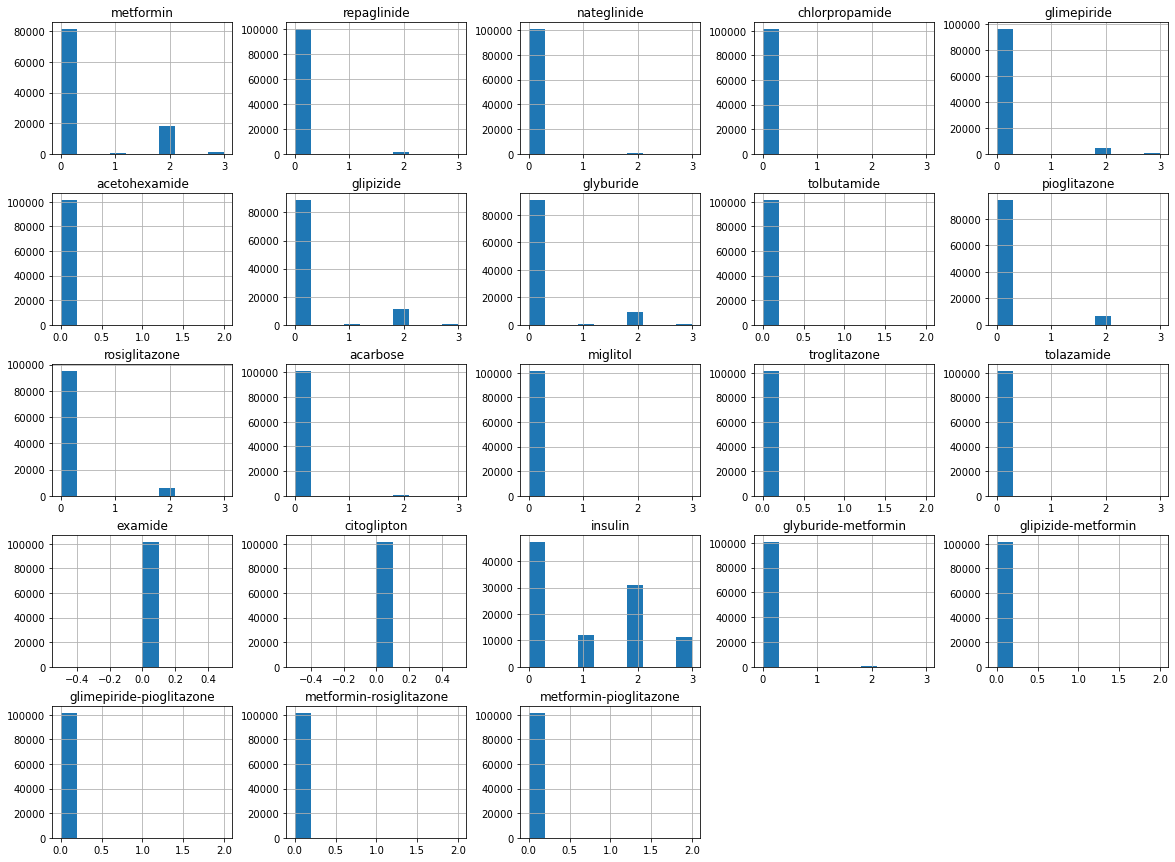

In [120]:
df.iloc[:,11:34].hist(figsize = (20,15))
plt.show()

In [121]:
df.iloc[:,11:34].std()

metformin                   0.814239
repaglinide                 0.252227
nateglinide                 0.168207
chlorpropamide              0.060355
glimepiride                 0.451349
acetohexamide               0.006270
glipizide                   0.675834
glyburide                   0.630124
tolbutamide                 0.030064
pioglitazone                0.524364
rosiglitazone               0.490372
acarbose                    0.111679
miglitol                    0.038000
troglitazone                0.010859
tolazamide                  0.039768
examide                     0.000000
citoglipton                 0.000000
insulin                     1.099979
glyburide-metformin         0.166656
glipizide-metformin         0.022604
glimepiride-pioglitazone    0.006270
metformin-rosiglitazone     0.008866
metformin-pioglitazone      0.006270
dtype: float64

In [122]:
names = df.columns.values[11:34]
for el in names:
    n = (df[el]!=0).sum()
    if n < 20:
        print(el)
        print(n)

acetohexamide
1
troglitazone
3
examide
0
citoglipton
0
glipizide-metformin
13
glimepiride-pioglitazone
1
metformin-rosiglitazone
2
metformin-pioglitazone
1


Usuńmy kolumny o zerowym odchyleniu.

In [123]:
df = df.drop(['examide','citoglipton'], axis=1)

Usuńmy kolumny, które przyjmują mało wartości innych niż 0.

In [124]:
df = df.drop(['acetohexamide','troglitazone','glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone',
              'glipizide-metformin'], axis=1)

In [125]:
names = df.columns.values[11:26]

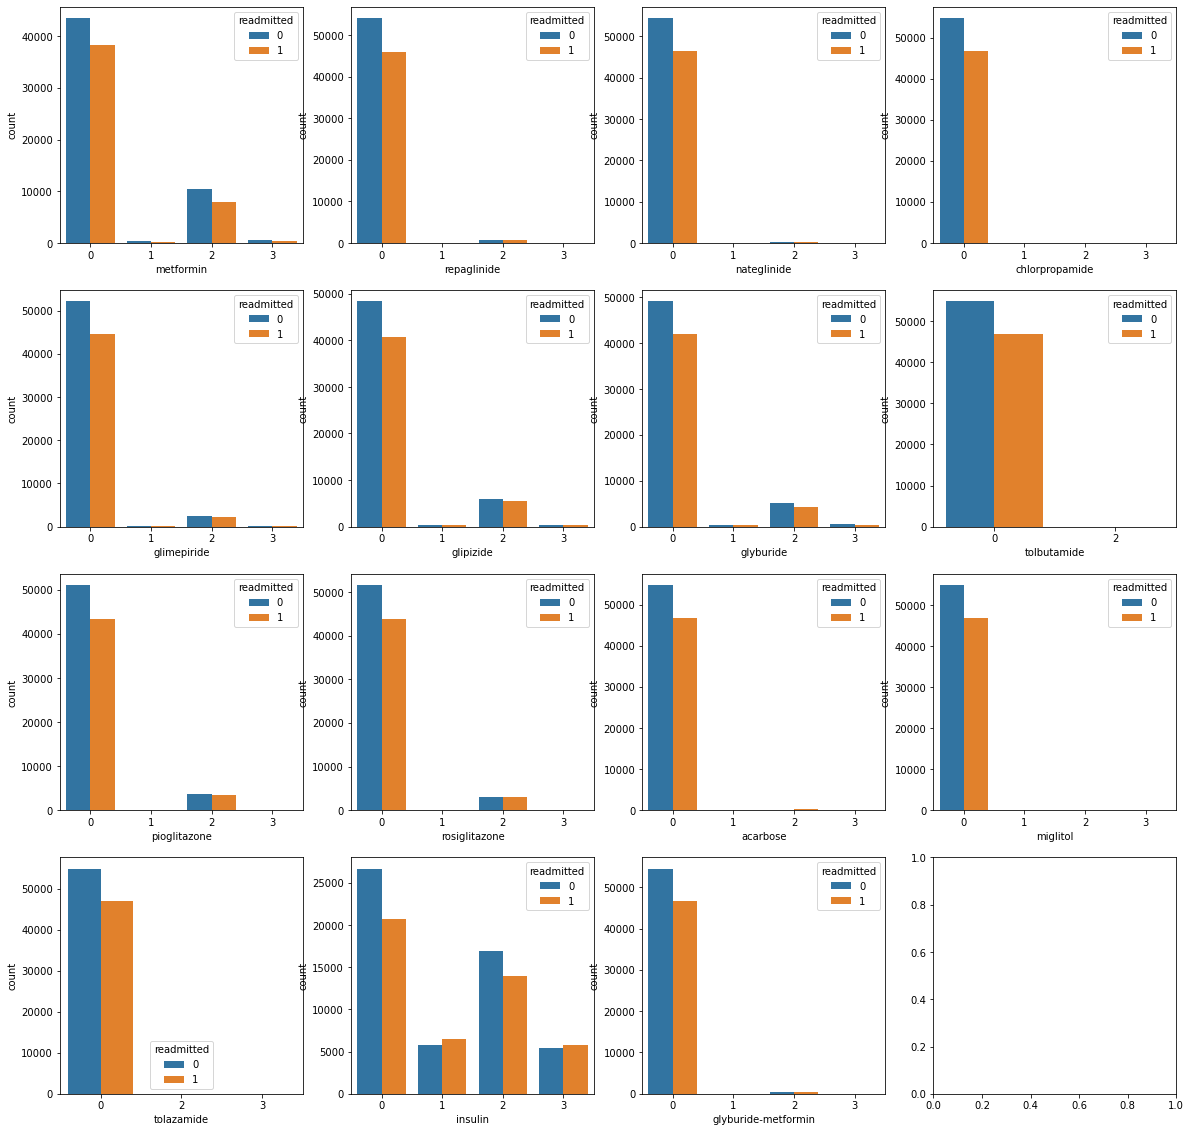

In [126]:
fig, axs = plt.subplots(figsize = (20,20), ncols = 4, nrows = 4)
i = 0
for el in names:
    sns.countplot(x=el, hue="readmitted", data=df, ax = axs[i//4,i%4])
    i+=1

### change

In [127]:
df['change'].value_counts()

No    54754
Ch    47009
Name: change, dtype: int64

In [128]:
df.loc[df['change'] == "No",'change'] = 0
df.loc[df['change'] == "Ch",'change'] = 1
df['change'] = df['change'].astype('int64')

C:\Users\ltoma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


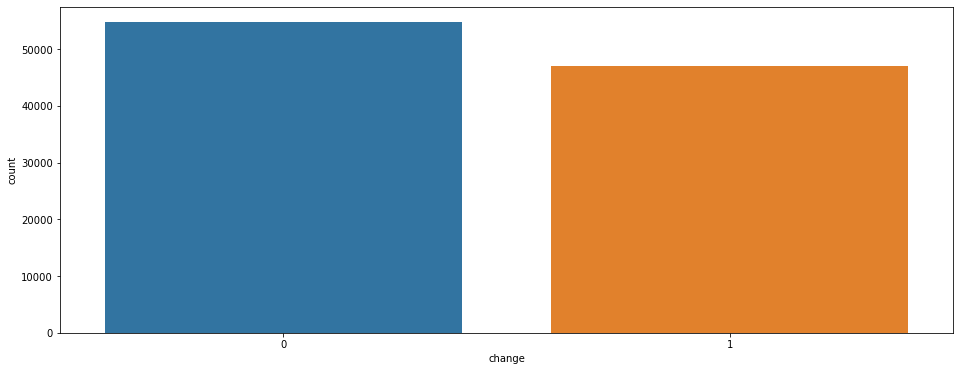

In [129]:
plt.figure(figsize=(16, 6))
sns.countplot(df['change'])
plt.show()

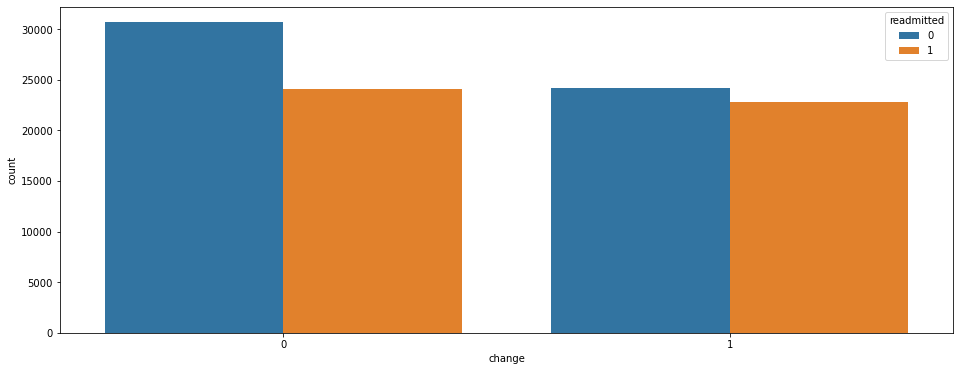

In [130]:
plt.figure(figsize=(16, 6))
sns.countplot(x="change", hue="readmitted", data=df)
plt.show()

### diabetesMed

In [131]:
df['diabetesMed'].value_counts()

Yes    78361
No     23402
Name: diabetesMed, dtype: int64

In [132]:
df.loc[df['diabetesMed'] == "No",'diabetesMed'] = 0
df.loc[df['diabetesMed'] == "Yes",'diabetesMed'] = 1
df['diabetesMed'] = df['diabetesMed'].astype('int64')

C:\Users\ltoma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


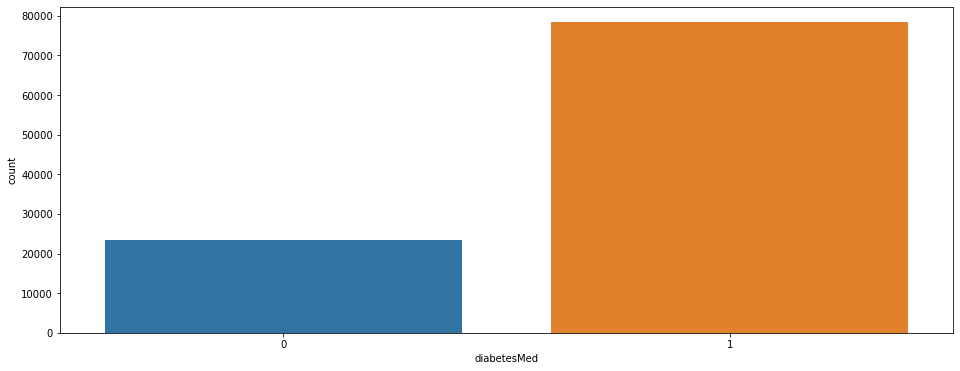

In [133]:
plt.figure(figsize=(16, 6))
sns.countplot(df['diabetesMed'])
plt.show()

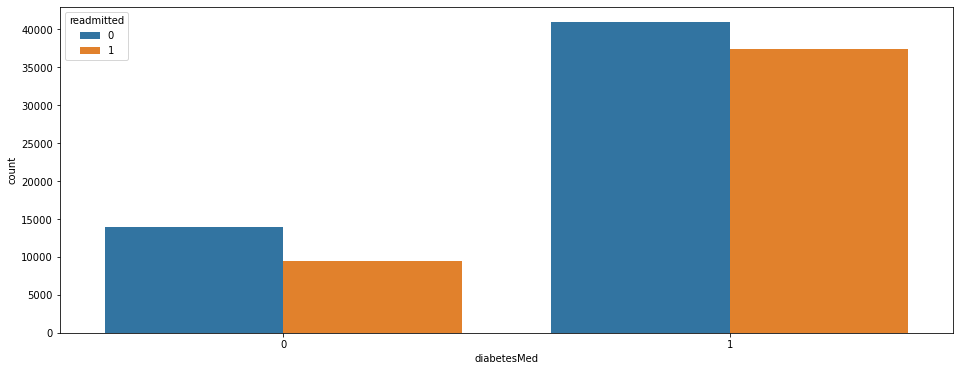

In [134]:
plt.figure(figsize=(16, 6))
sns.countplot(x="diabetesMed", hue="readmitted", data=df)
plt.show()

### readmitted

In [135]:
df['readmitted'].value_counts()

0    54861
1    46902
Name: readmitted, dtype: int64

C:\Users\ltoma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


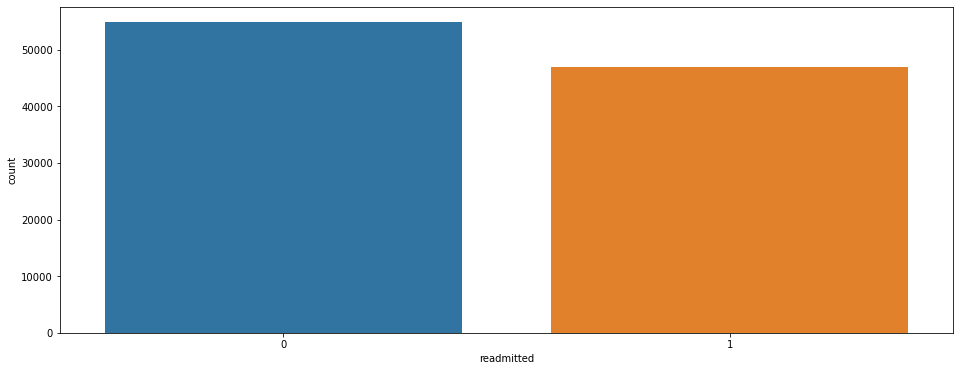

In [136]:
plt.figure(figsize=(16, 6))
sns.countplot(df['readmitted'])
plt.show()

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101763 entries, 0 to 101765
Columns: 115 entries, age to diag_3_Respiratory
dtypes: int32(1), int64(29), uint8(85)
memory usage: 36.0 MB


Po preprocesingu liczba kolumn wzrosła do 115, a liczba rekordów spadła fo 101763. Nasza ramka zawiera kolumny typu int.

Wszystkie kolumny, które nie zostały usunięte w trakcie preprocesingu (z wyjątkiem kolumny readmitted) mogą być wykorzystane jako zmienne objaśniające. 

## Podsumowanie - wykonane kroki preprocesingu

- Zdefiniowanie problemu (zmienna objaśniana i zmienne objaśniające)
- Zapoznanie się z danymi (sprawdzenie braków i duplikatów, sprawdzenie typów danych)
- Zbadanie korelacji
- Usunięcie niepotrzebnych zmiennych
- Usunięcie zmiennych o małej liczbie rekordów i niskiej wariancji
- Imputacja zmiennych kategorycznych
- Encoding zmiennych kategorycznych
- Zamiana typów kolumn na int
- Dyskretyzacja zmiennych
- Stworzenie zmiennej multiple_times
- Analiza jednowymiarowa (histogramy, unikalne wartości, średnia/mediana/kwartyle, boxploty)
- Wartości odstające
- Analiza dwuwymiarowa (jak inne zmmienne wpływają na zmienną readmitted)
